# Genetic drift and selection

In [19]:
# %matplotlib widget
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

from matplotlib.patches import Rectangle

import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("ticks")
sns.set_context("paper")

def freq_trajectory(N, n=1, s=0):
    yield n
    while N > n > 0:
        n = np.random.binomial(N, n*(1+s)/((N-n)+(n)*(1+s)), 1)[0]
        yield n
        
def tight(fig):
    fig.canvas.header_visible = False
    plt.tight_layout()

## Allele frequency of a neutral allele

Rerun the cell below to see different outcomes:

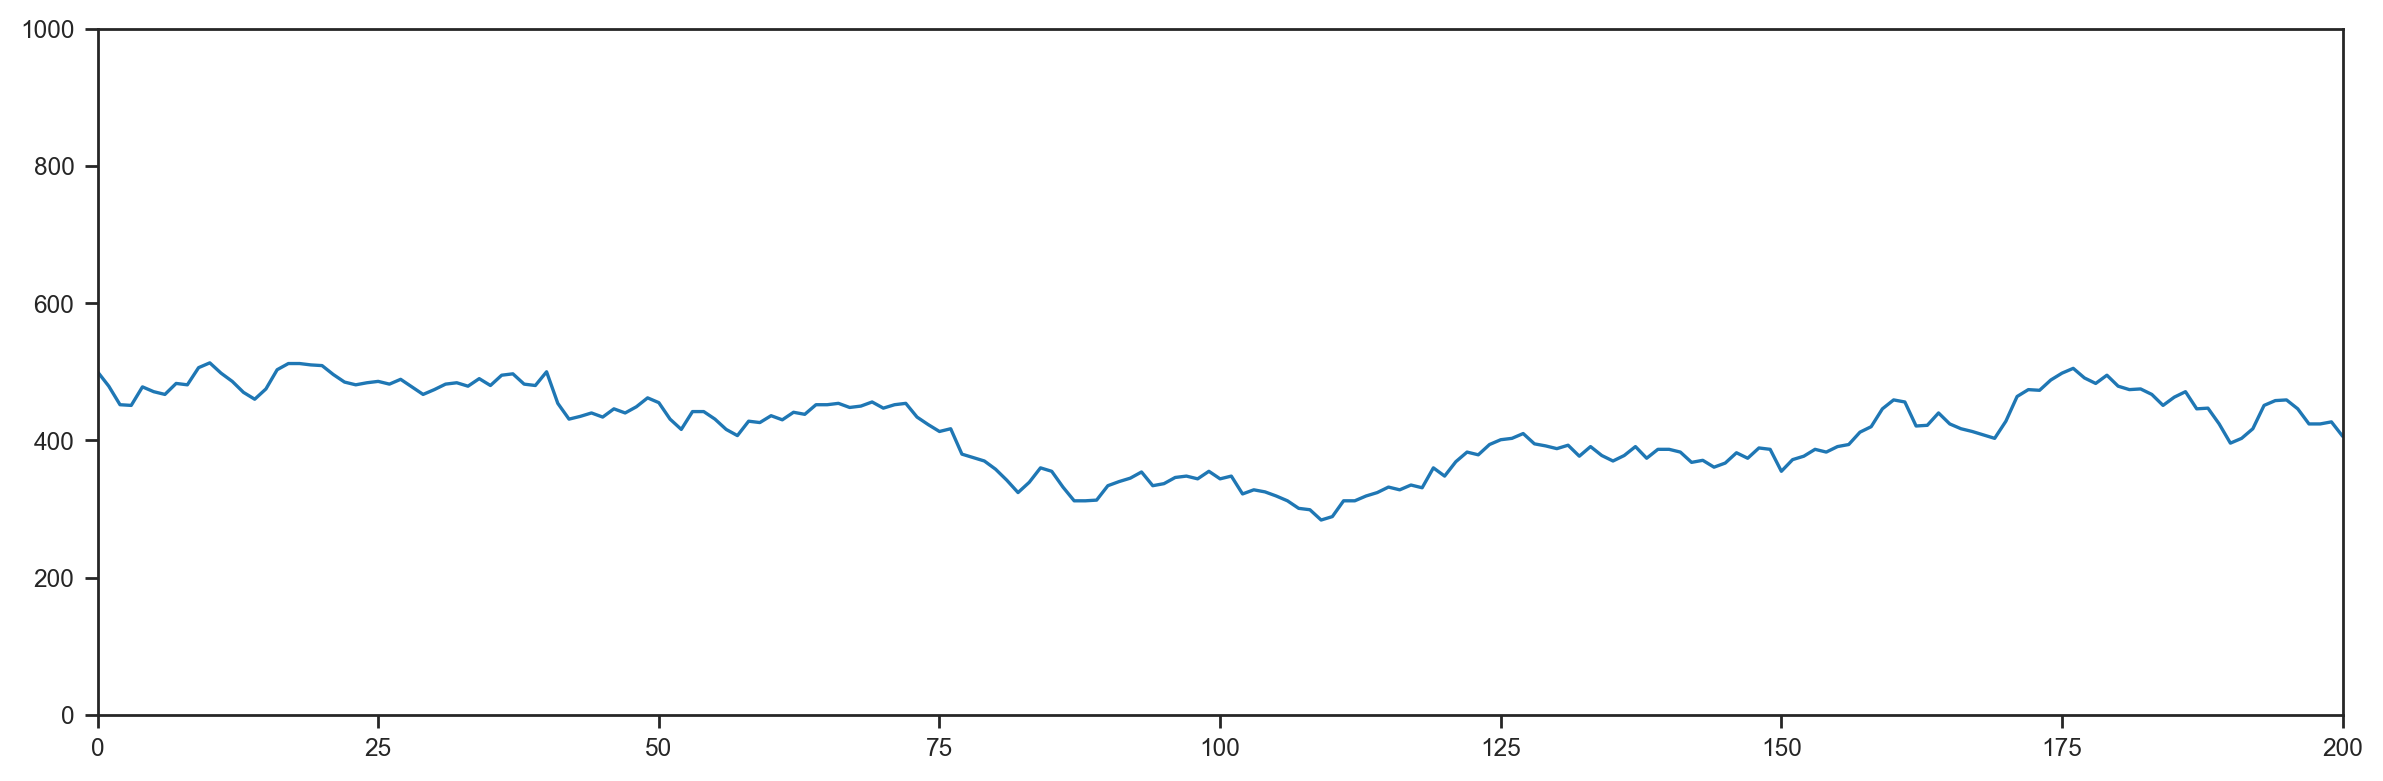

In [37]:
# Number of haploid individuals with the allele
n = 500
# Population size
N = 1000
# selection coeficient
s = 0.0

fig = plt.figure(figsize=(12, 4))
for i in range(1):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.xlim(0, 200)
plt.ylim(0, N)
tight(fig)

Ten different outcomes:

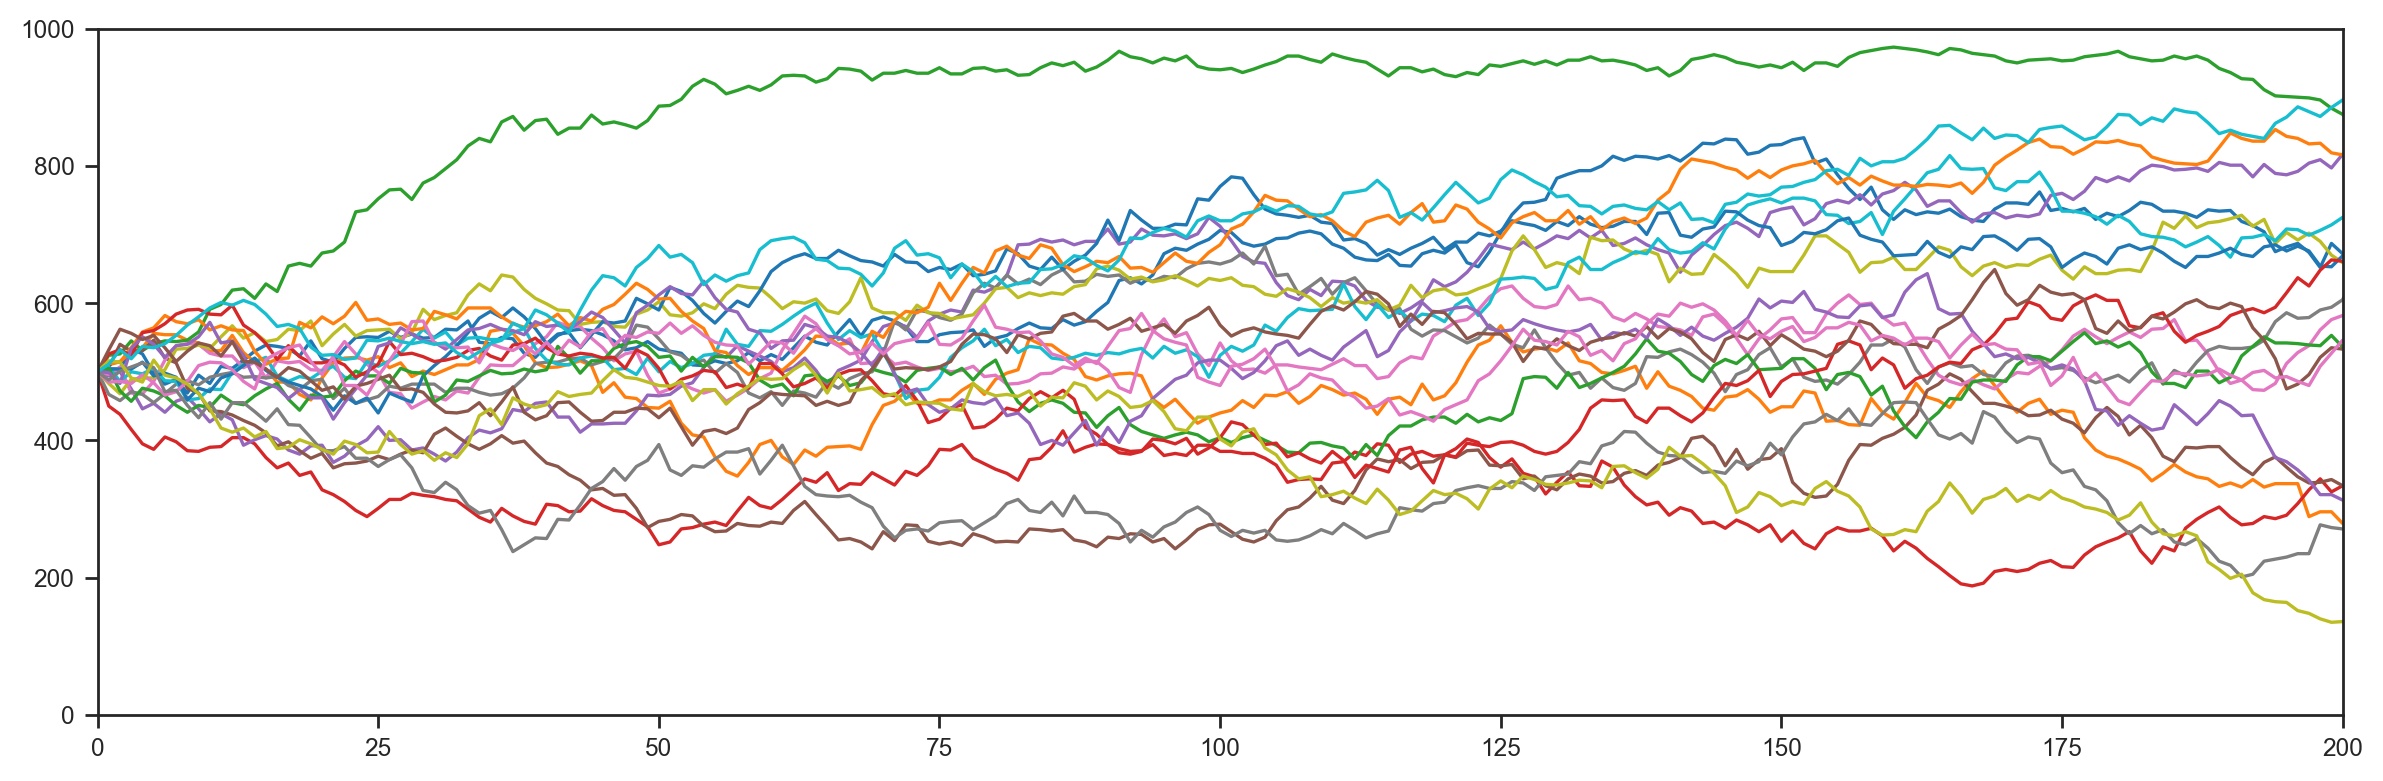

In [38]:
fig = plt.figure(figsize=(12, 4))
plt.xlim(0, 200)
plt.ylim(0, N)

s = 0.0
for i in range(20):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
tight(fig)

20 outcomes for two different popoulation sizes: 500 and 5000

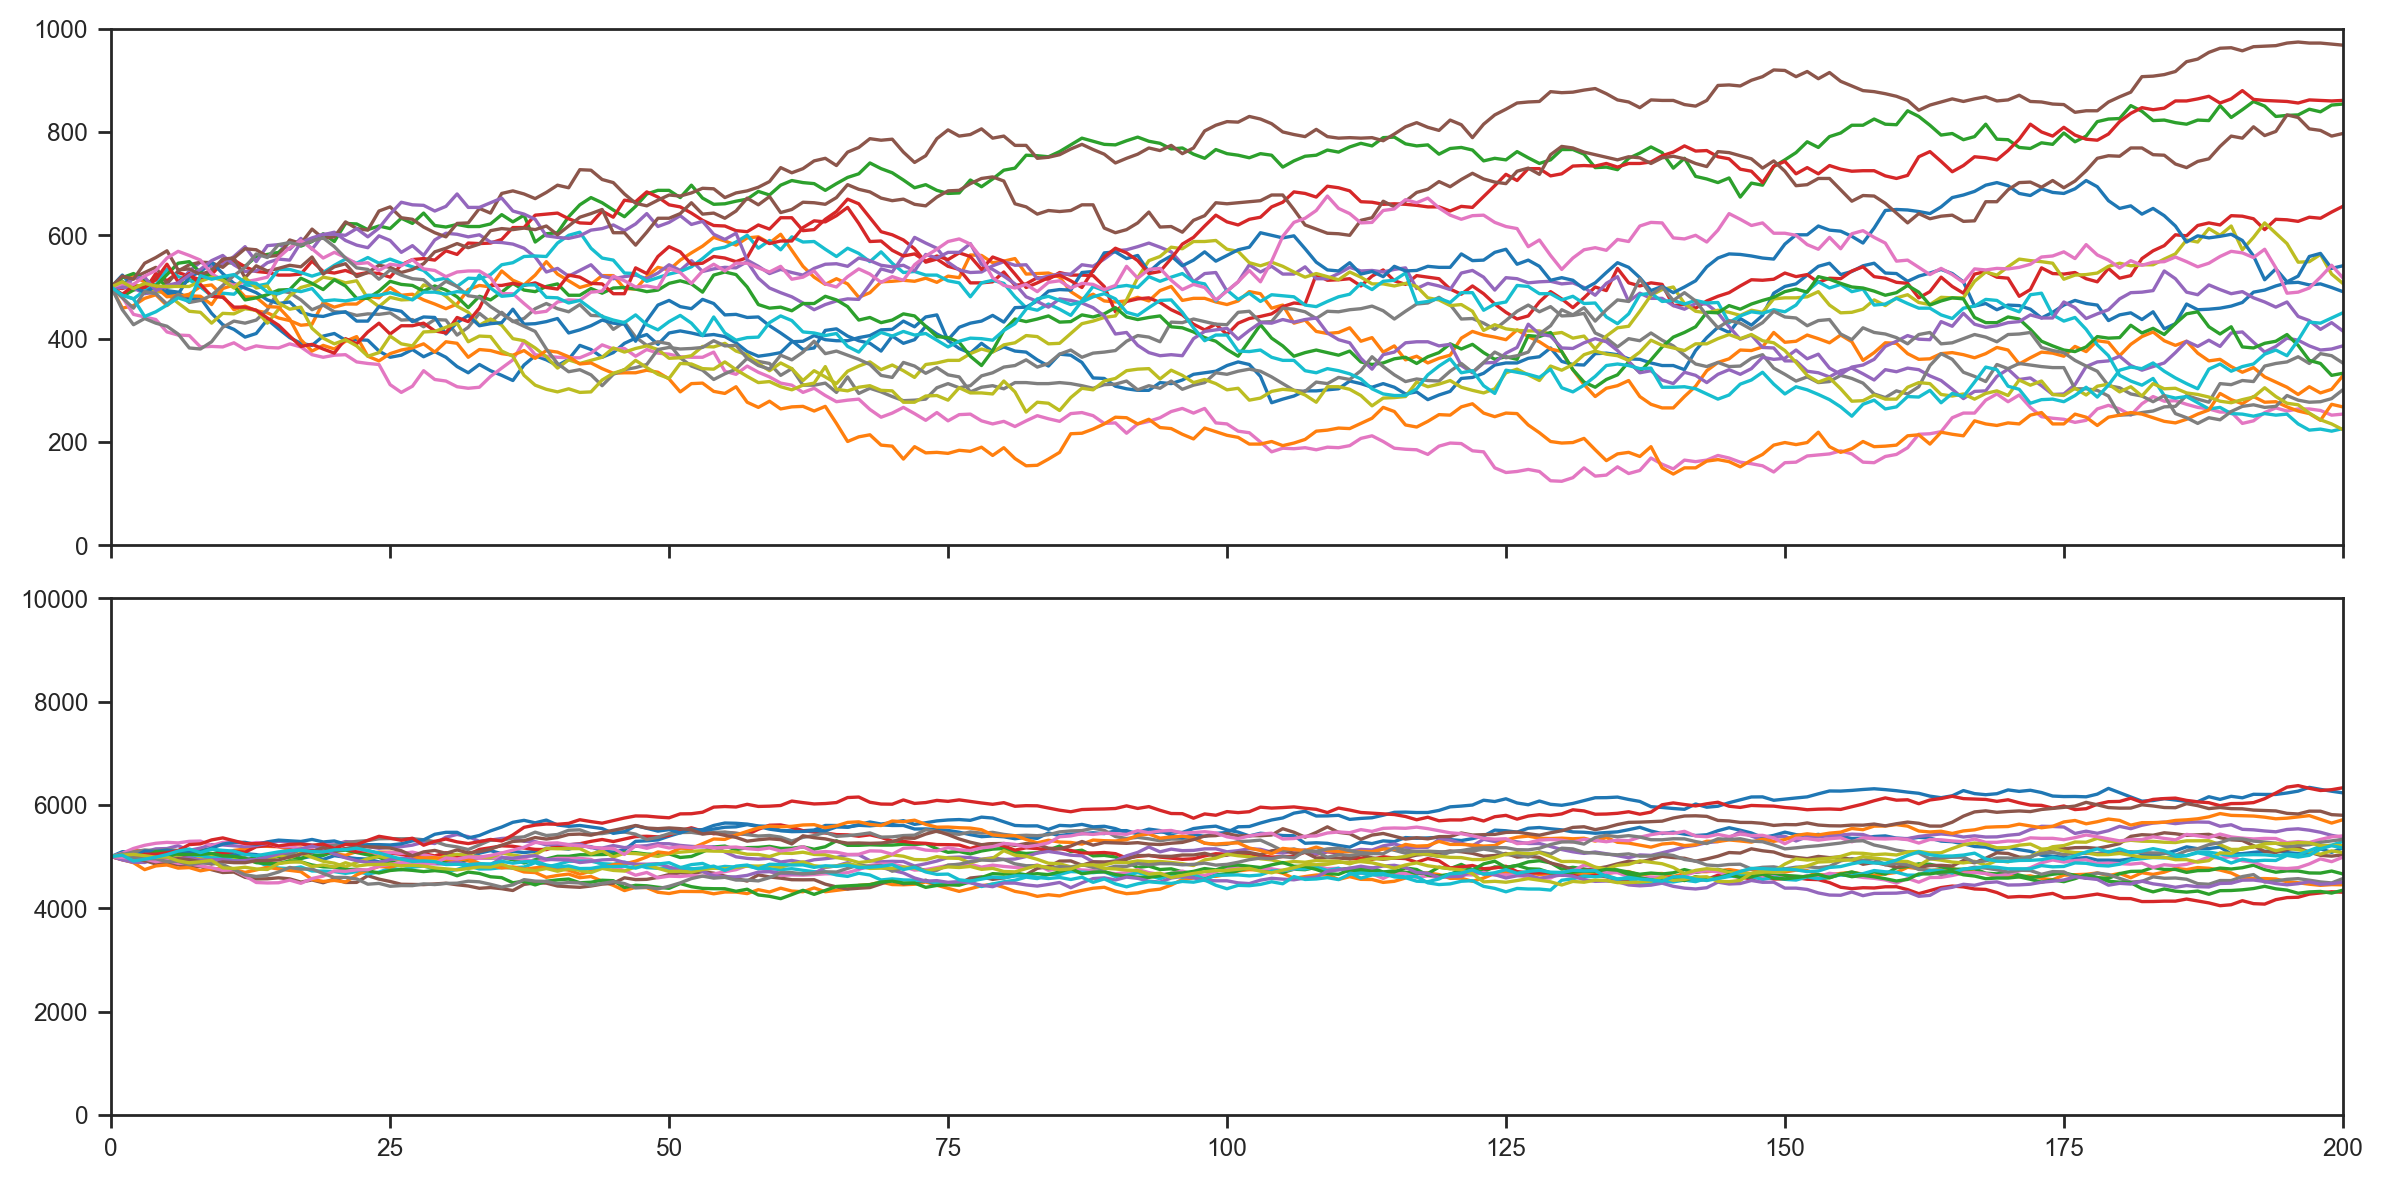

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
plt.xlim(0, 200)
s = 0.0
for i in range(20):
    ax1.plot(list(freq_trajectory(1000, n=500, s=s)))
    ax1.set_ylim(0, 1000)
    ax2.plot(list(freq_trajectory(10000, n=5000, s=s)))
    ax2.set_ylim(0, 10000)
tight(fig)       

Same as above, but now we let follow each allele long enough to see it get lost of fixed. In small populations mutations are lost or fix faster than in large populations.

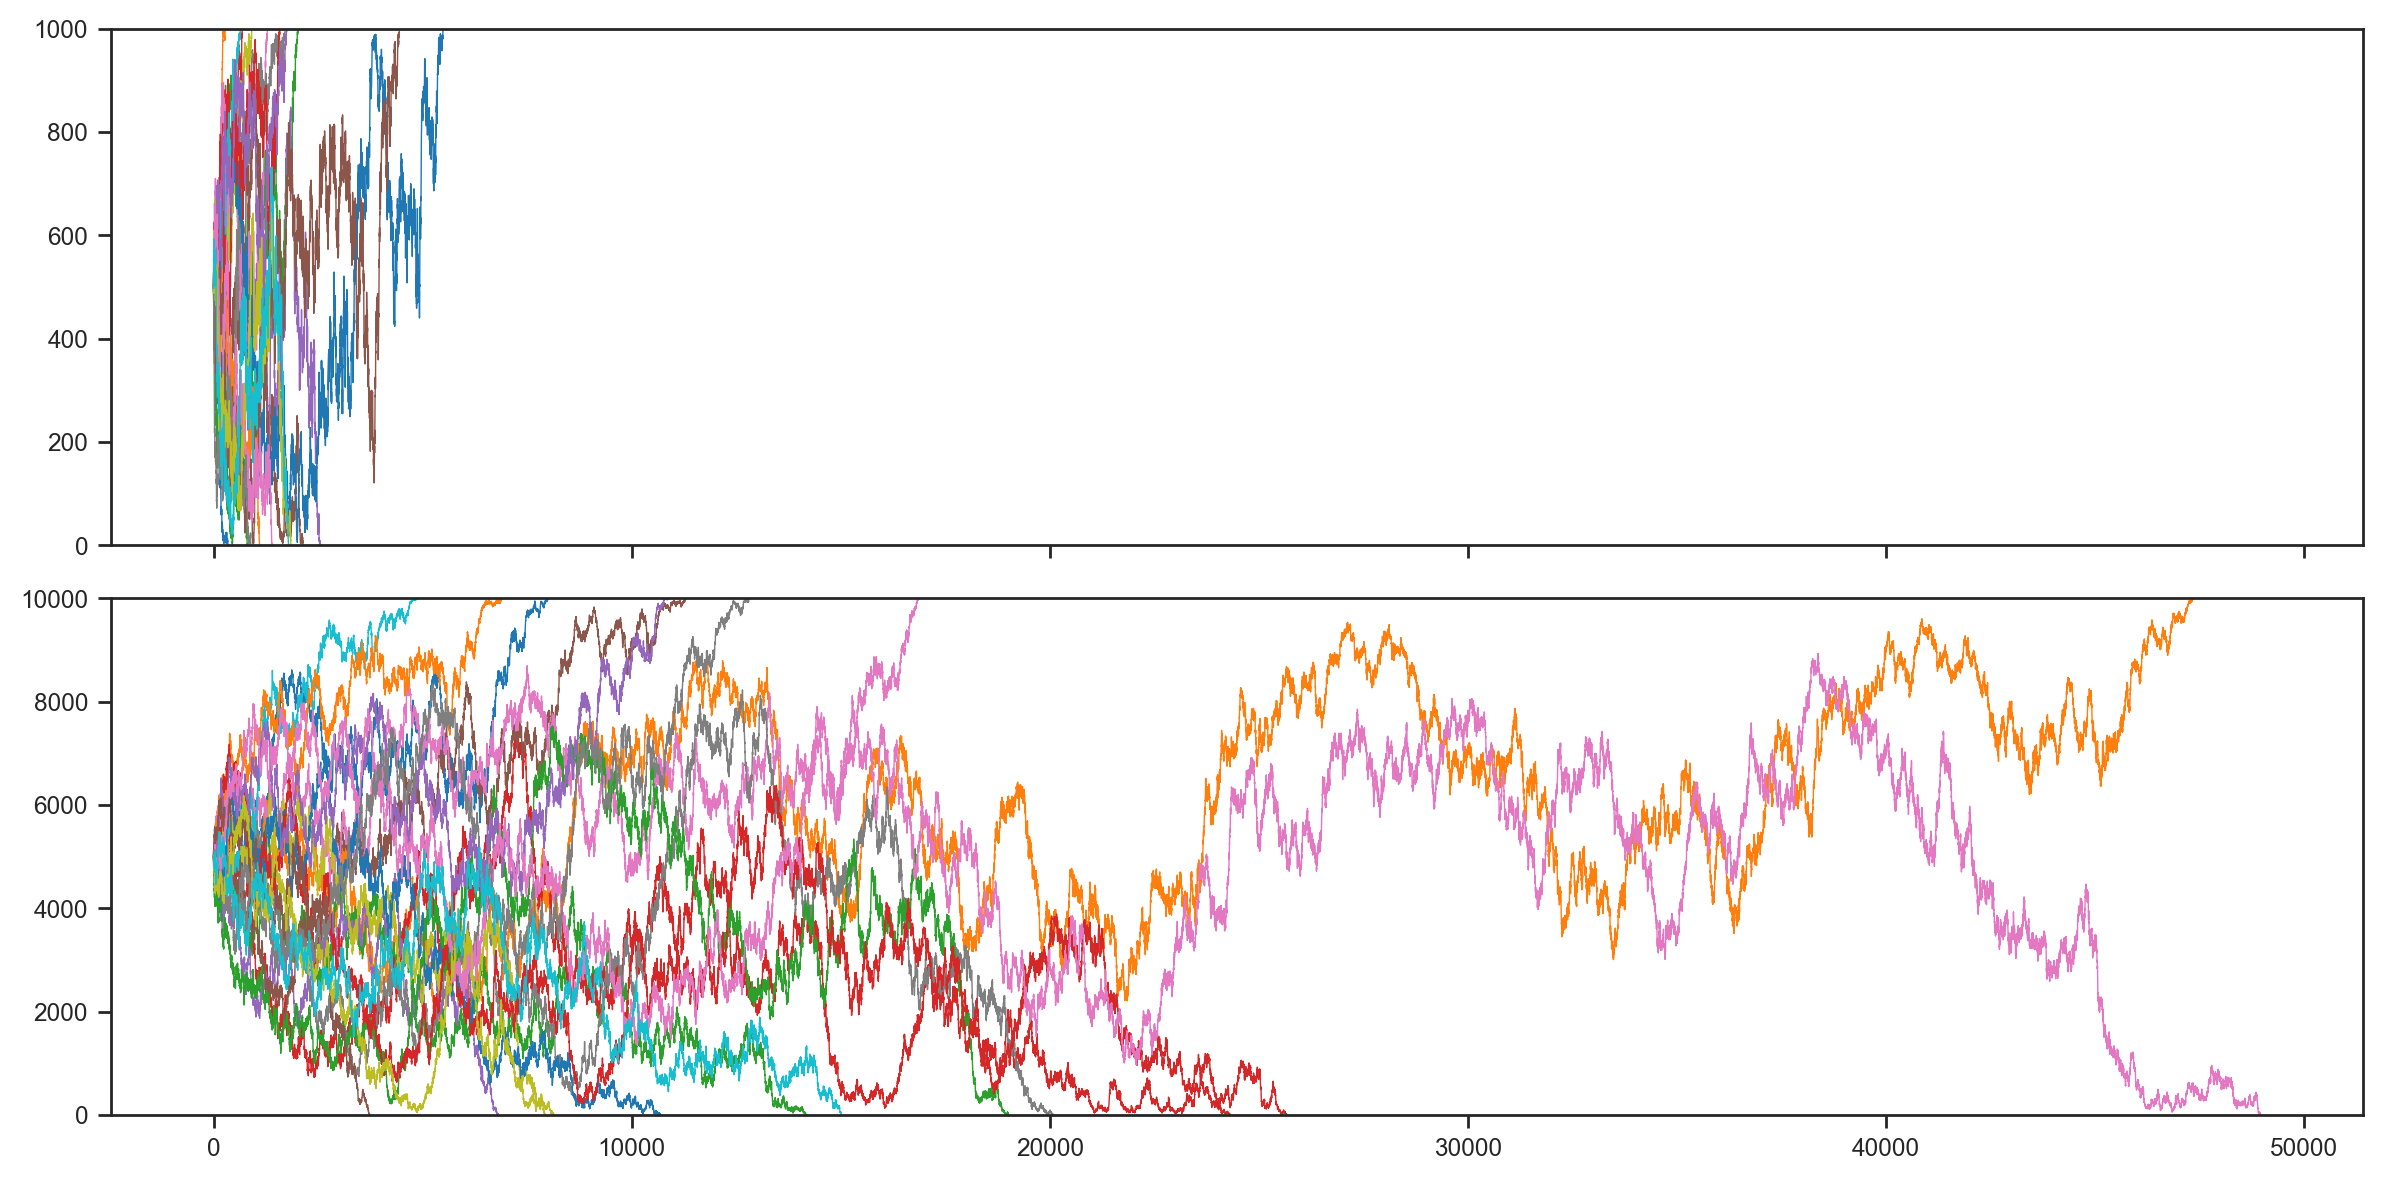

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 10000)
s = 0.0
for i in range(20):
    ax1.plot(list(freq_trajectory(1000, n=500, s=s)), linewidth=0.5)
    ax2.plot(list(freq_trajectory(10000, n=5000, s=s)), linewidth=0.5)
tight(fig)      

# Drift with mutation

In [6]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# N1, N2 = 100, 1000
# mu = 0.001
# s = 0.0

# t1 = np.zeros(10000)
# t2 = np.zeros(10000)
# ax1_coord = []
# ax2_coord = []

# f = list(freq_trajectory(N1, n=1, s=s))
# x = list(range(g, g+len(f)))
# t1[x] += f
# ax1_coord.append((f, x))

# f = list(freq_trajectory(N2, n=1, s=s))
# x = list(range(g, g+len(f)))
# t1[x] += f
# ax2_coord.append((f, x))
        

# for g in range(5000):
#     if random.random() < mu * N1:
#         f = list(freq_trajectory(N1, n=1, s=s))
#         x = list(range(g, g+len(f)))
#         t1[x] += f
#         ax1_coord.append((f, x))
#     if random.random() < mu * N2:
#         f = list(freq_trajectory(N2, n=1, s=s))
#         x = list(range(g, g+len(f)))
#         t2[x] += f
#         ax2_coord.append((f, x))

# t1[t1 == 0] = np.nan
# # t1[t1 == 1] = np.nan
# t2[t2 == 0] = np.nan
# # t2[t2 == 1] = np.nan

        
# for f, x in ax1_coord:
#     ax1.plot(x, f / t1[x])
#     # ax1.plot(x, f)
# for f, x in ax2_coord:
#     ax2.plot(x, f / t2[x])
#     # ax2.plot(x, f)
    
    
# ax1.plot(f1, x1)
# # ax1.set_ylim(0, 1.1)
# # ax2.set_ylim(0, 1.1)    
# ax1.set_xlim(3000, 5000)

Small and large population size:

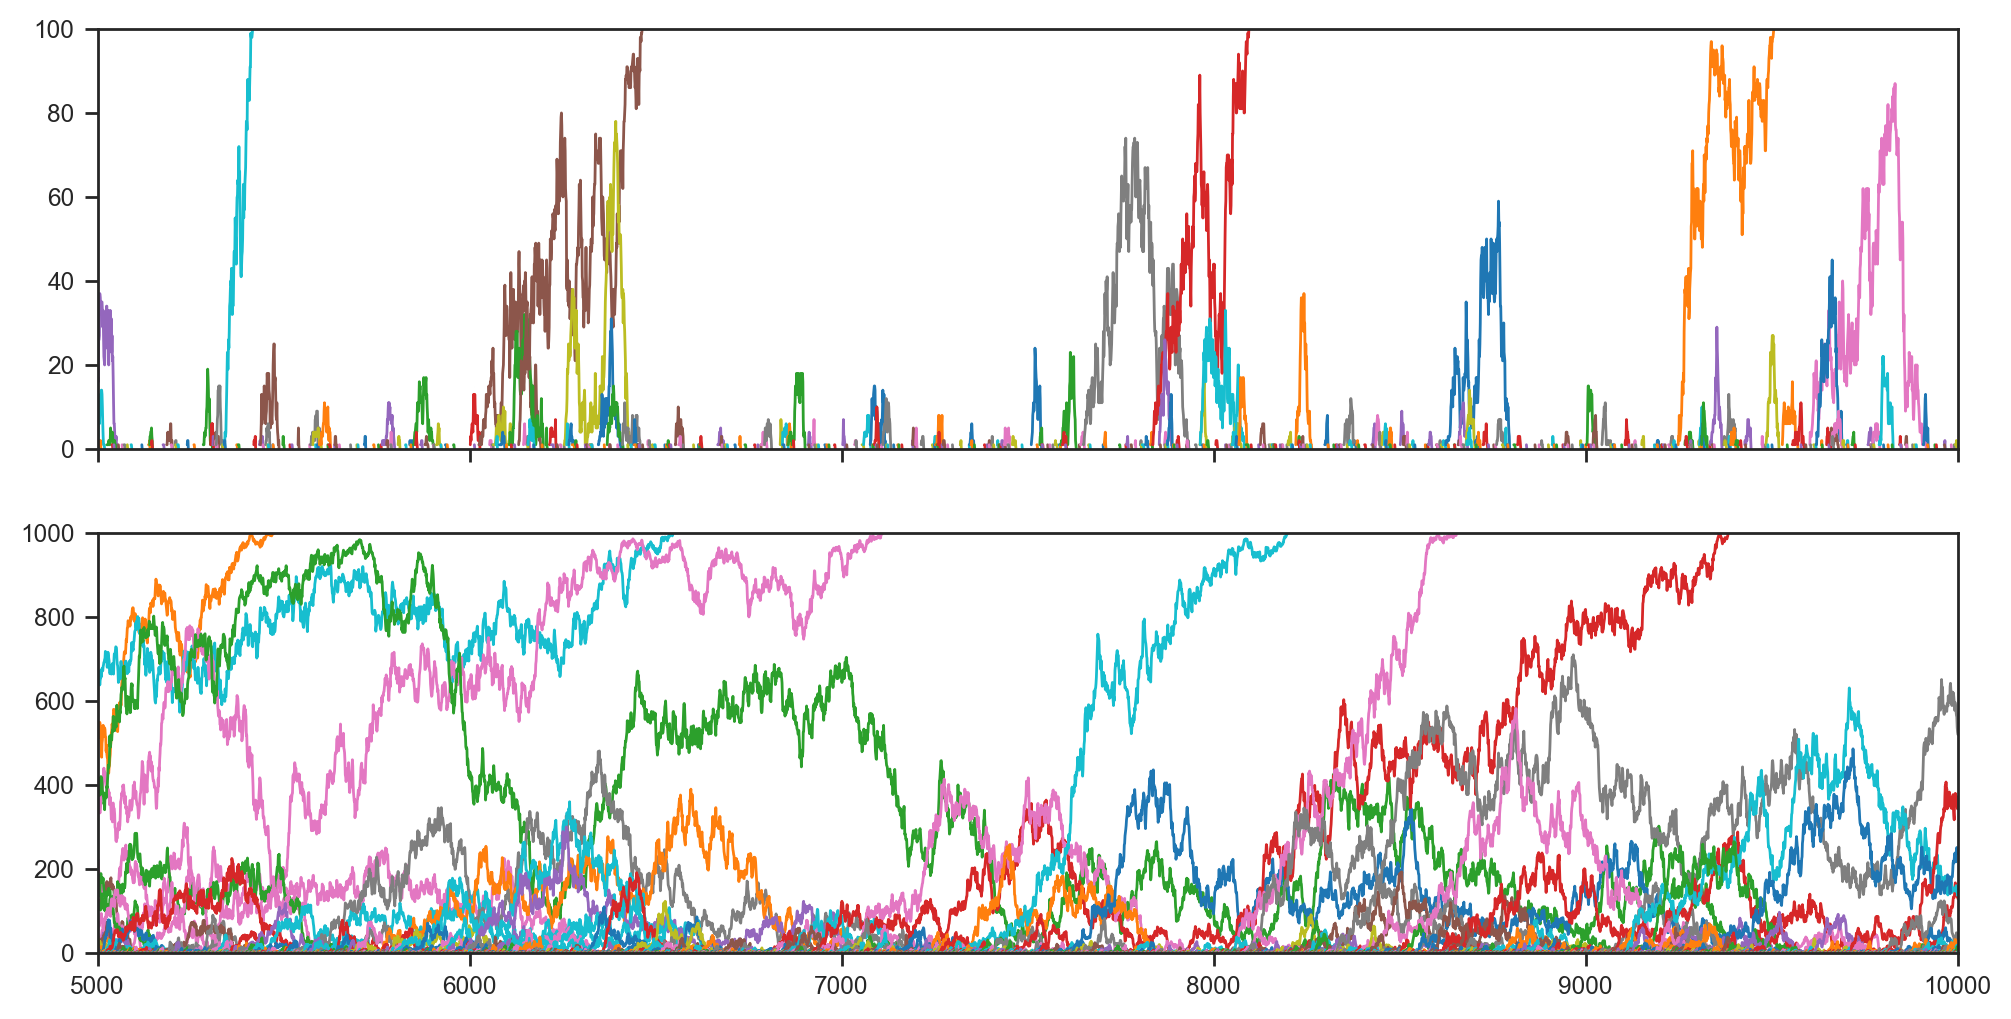

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

N1, N2 = 100, 1000
mu = 0.001
s = 0.0
for g in range(10000):
    if random.random() < mu * N1:
        f = list(freq_trajectory(N1, n=1, s=s))
        x = list(range(g, g+len(f)))
        ax1.plot(x, f, linewidth=1)
    if random.random() < mu * N2:
        f = list(freq_trajectory(N2, n=1, s=s))
        x = list(range(g, g+len(f)))
        ax2.plot(x, f, linewidth=1)
ax1.set_ylim(0, N1)
ax2.set_ylim(0, N2)    
ax1.set_xlim(5000, 10000) ;

Small and large mutation rate:

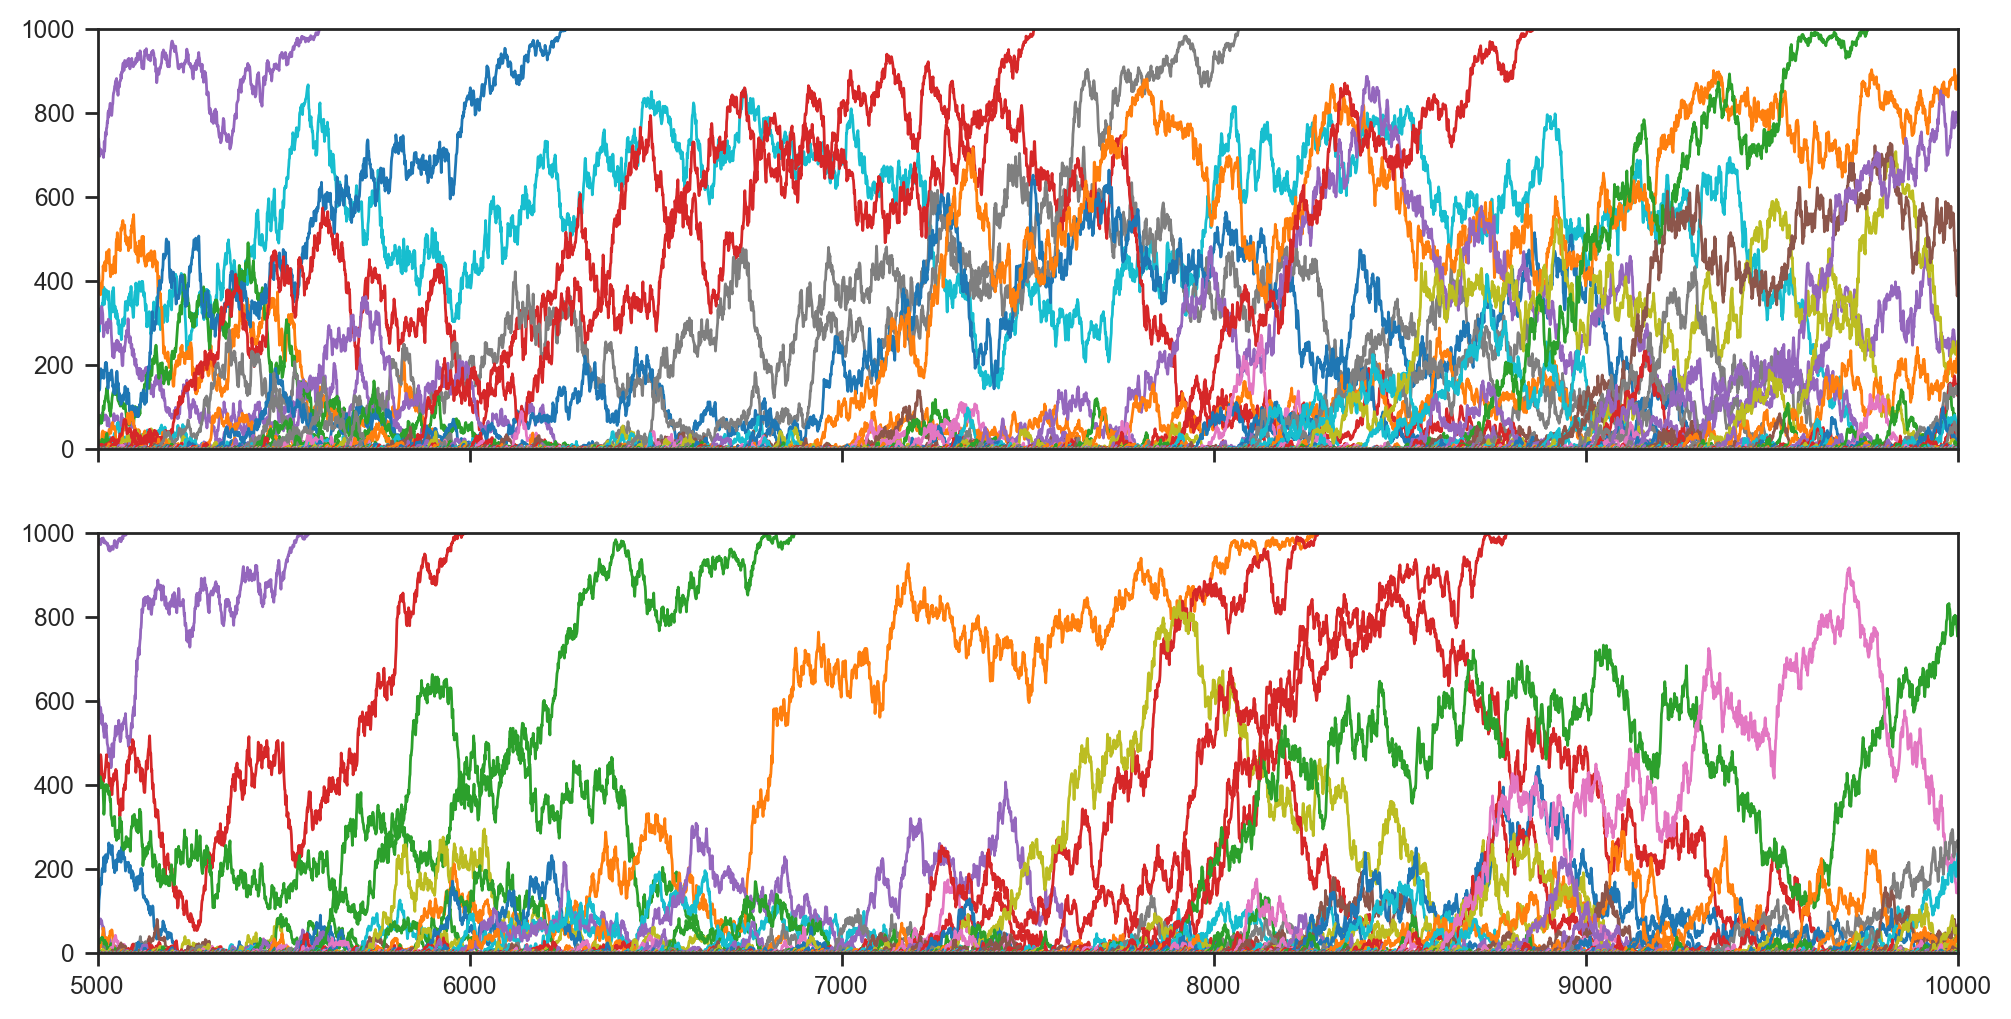

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

N1, N2 = 1000, 1000
mu1, mu2 = 0.001, 0.01
s = 0.0
for g in range(10000):
    if random.random() < mu1 * N1:
        f = list(freq_trajectory(N1, n=1, s=s))
        x = list(range(g, g+len(f)))
        ax1.plot(x, f, linewidth=1)
    if random.random() < mu2 * N2:
        f = list(freq_trajectory(N2, n=1, s=s))
        x = list(range(g, g+len(f)))
        ax2.plot(x, f, linewidth=1)
ax1.set_ylim(0, N1)
ax2.set_ylim(0, N2)    
ax1.set_xlim(5000, 10000) ;

Small and large population but with $N_1 \times \mu_1 = N_2 \times \mu_2$, I.e. $\theta_1 = \theta_2$:

(3000.0, 5000.0)

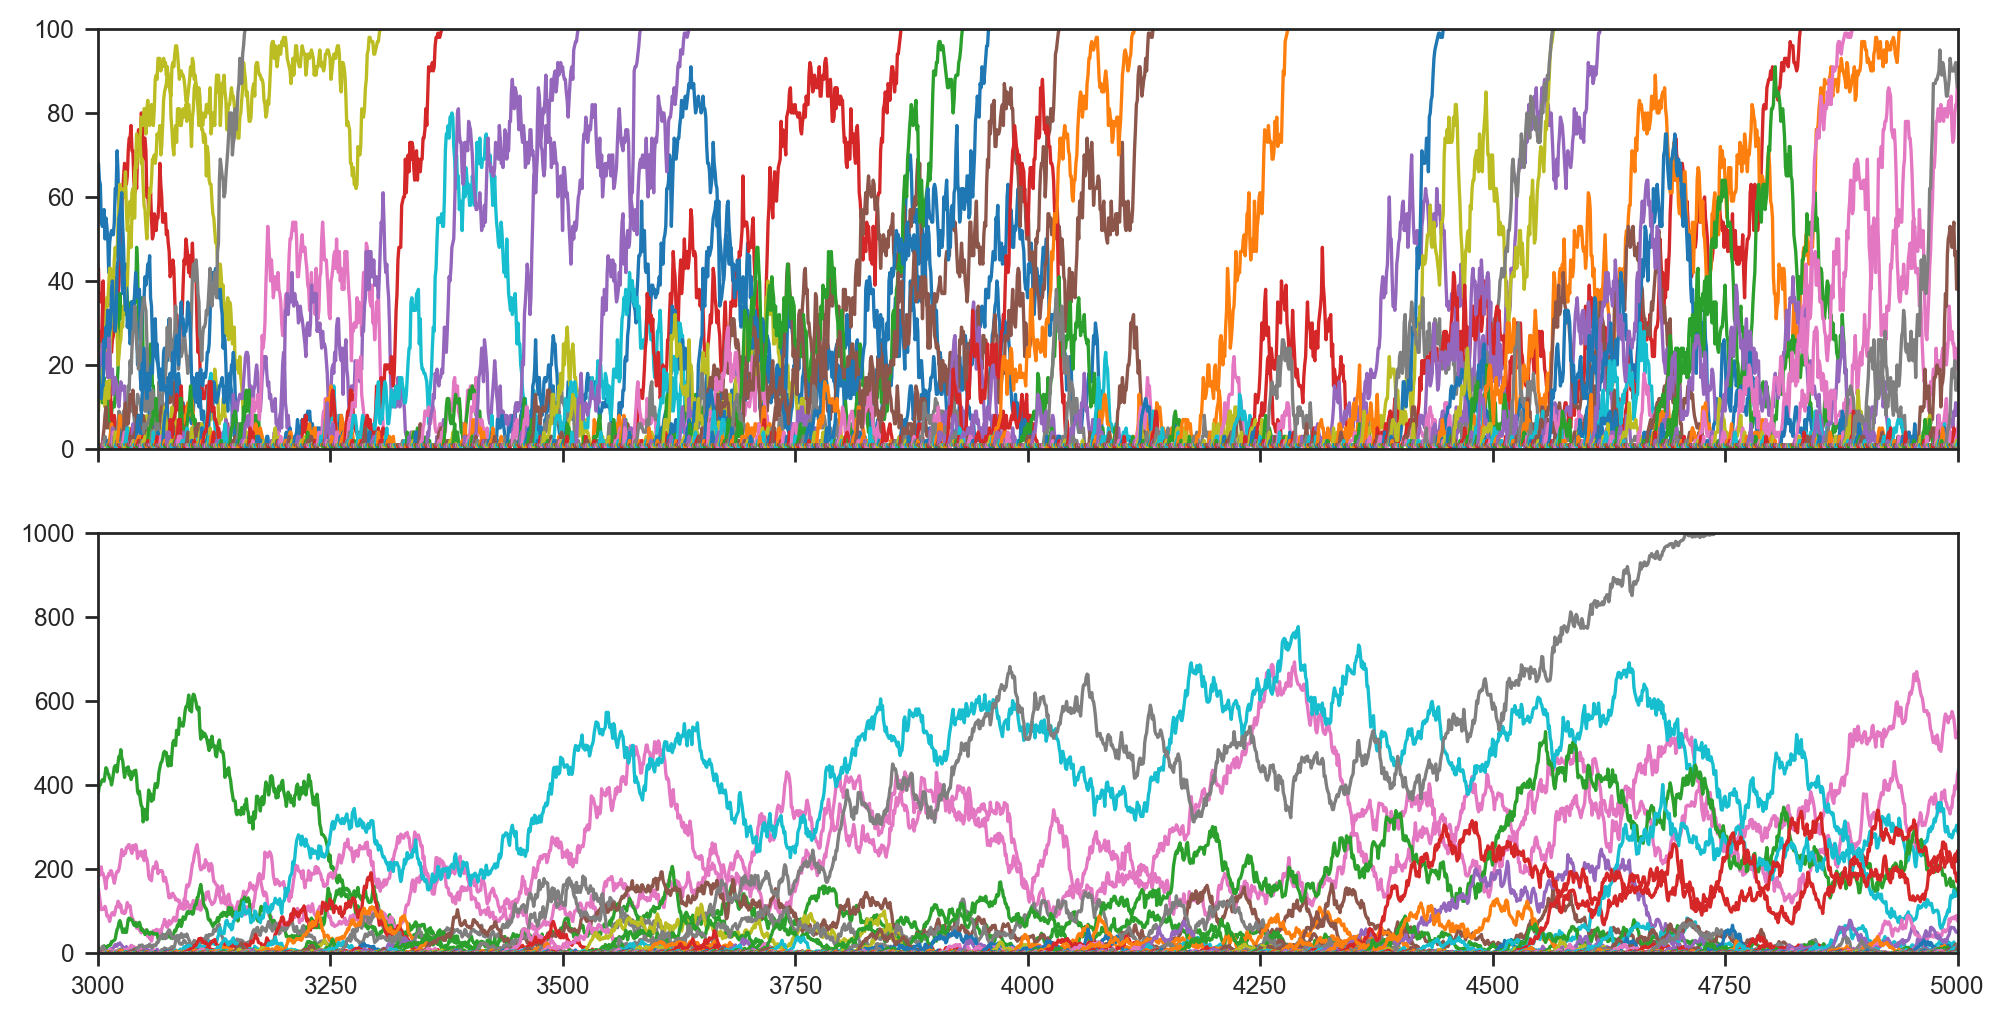

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

N1, N2 = 100, 1000
mu1, mu2 = 0.01, 0.001
s = 0.0
for g in range(5000):
    if random.random() < mu1 * N1:
        f = list(freq_trajectory(N1, n=1, s=s))
        x = list(range(g, g+len(f)))
        ax1.plot(x, f)
    if random.random() < mu2 * N2:
        f = list(freq_trajectory(N2, n=1, s=s))
        x = list(range(g, g+len(f)))
        ax2.plot(x, f)
ax1.set_ylim(0, N1)
ax2.set_ylim(0, N2)    
ax1.set_xlim(3000, 5000)

## Weak positive selection

Frequency trajectories of new mutations with a selective advantage. Even with positive selection, most are quickly lost from the population. Use the Zoom tool on the figure to zoom in on the bottom left corner of the plot to see the the many alleles thare are lost.

Ns = 100.0


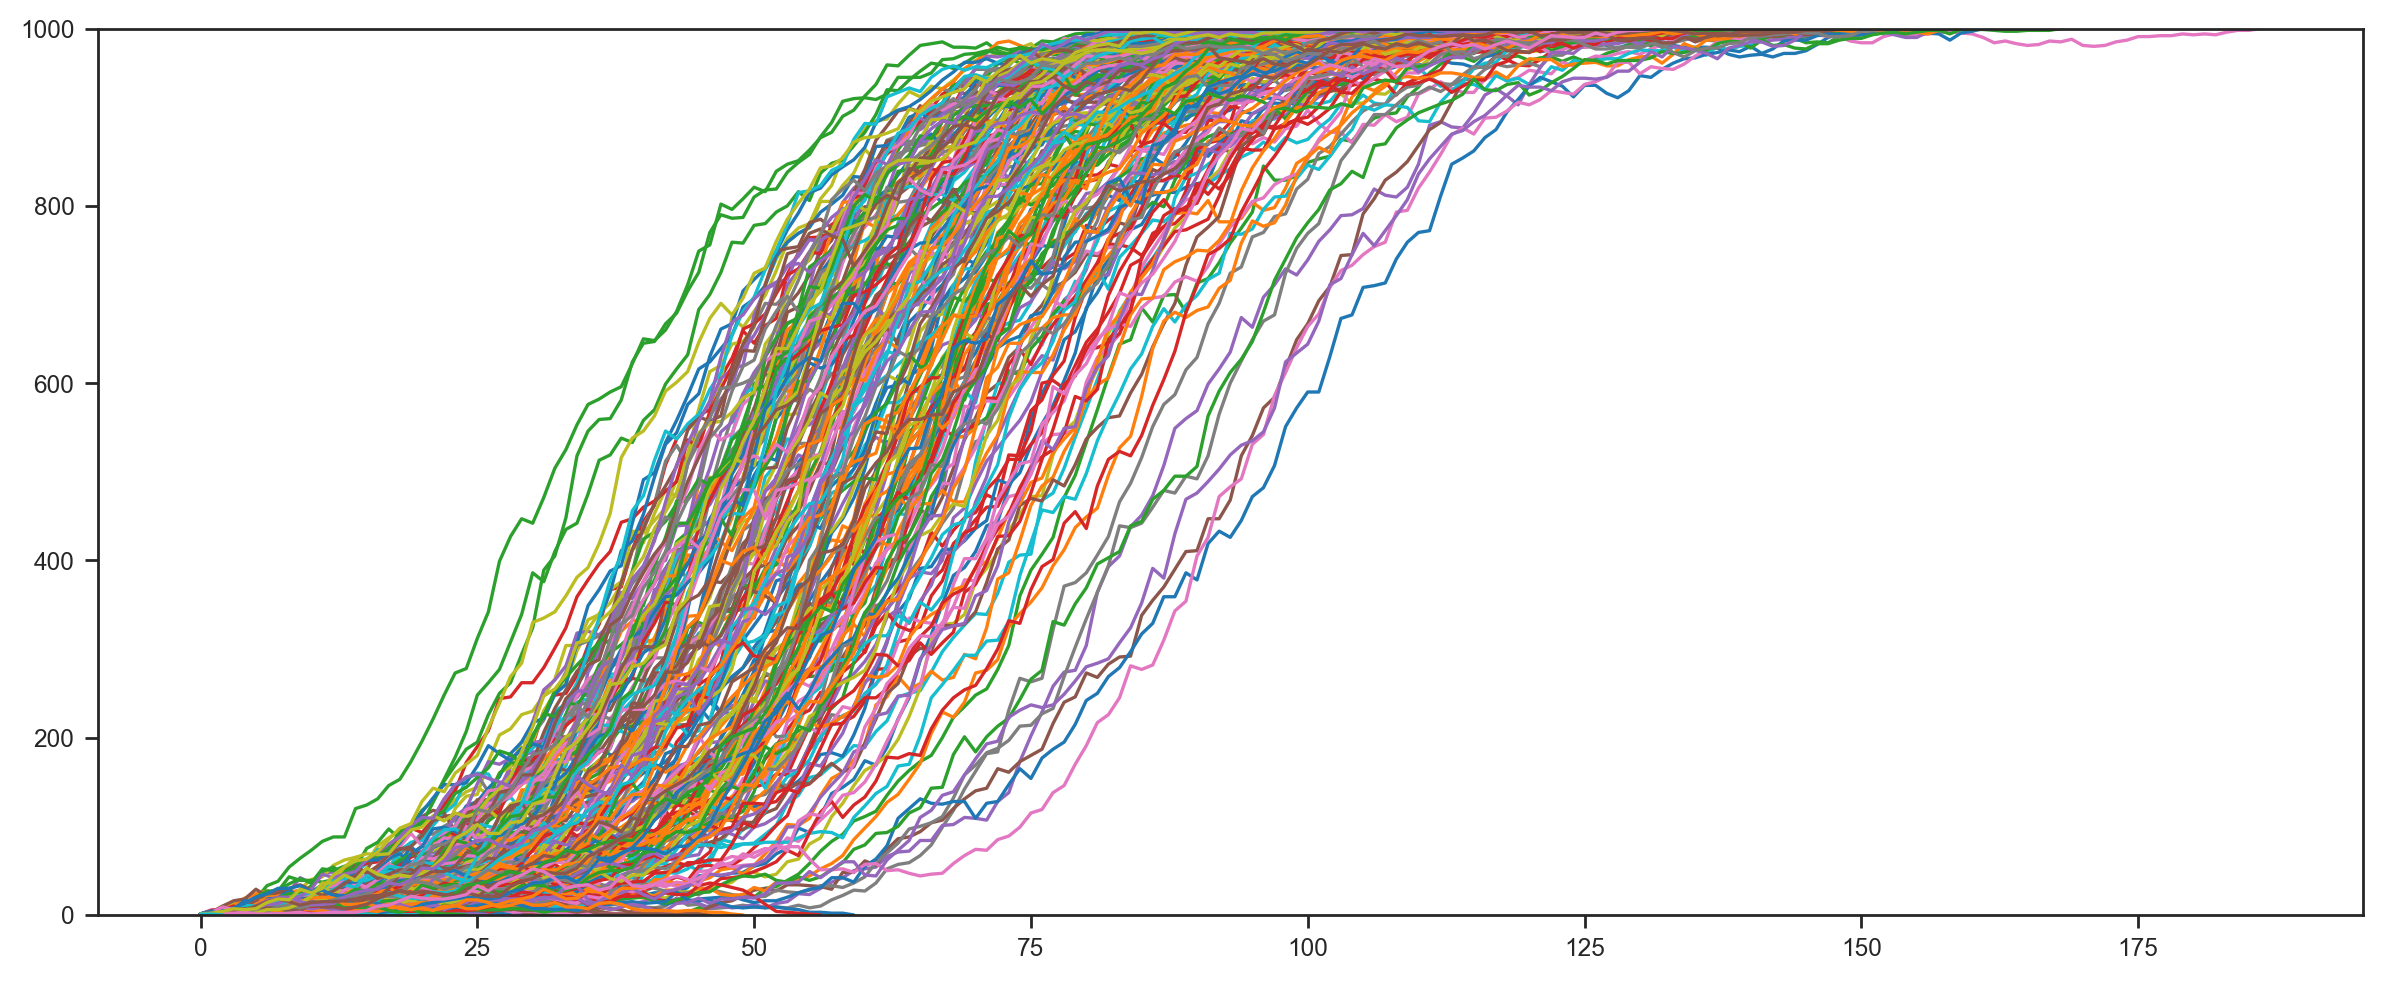

In [33]:
n = 1
N = 1000
s = 0.1
print(f"Ns = {N*s}")
fig = plt.figure(figsize=(12, 5))
for i in range(1000):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.ylim(0, N)
tight(fig)

Fixation times dependence on N

In [ ]:
def fixation_times(N, n=n, s=s):
    times = list()
    for i in range(500000): 
        freqs = list(freq_trajectory(N, n=n, s=s))
        if freqs[-1]:
            times.append(len(freqs))
    return times

times_2000 = fixation_times(2000, n=1, s=0.0005)
times_5000 = fixation_times(5000, n=1, s=0.0005)
times_10000 = fixation_times(10000, n=1, s=0.0005)
times_100000 = fixation_times(100000, n=1, s=0.0005)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.kdeplot(times_2000, ax=ax, linewidth=3)
sns.kdeplot(times_5000, ax=ax, linewidth=3)
sns.kdeplot(times_10000, ax=ax, linewidth=3)
sns.kdeplot(times_100000, ax=ax, linewidth=3)
plt.tight_layout()

In [ ]:
# fig, axes = plt.subplots(4, 1)
# axes[0].hist(times_2000, bins=range(0, 30000, 1000))
# axes[1].hist(times_5000, bins=range(0, 30000, 1000)) 
# axes[2].hist(times_10000, bins=range(0, 30000, 1000))
# axes[3].hist(times_100000, bins=range(0, 30000, 1000))
# plt.tight_layout()

## Weak negative selection

Frequency trajectories of new mutations with a selective disadvantage. Even with negative selection, some alleles linger in the population and may even be fixed. Use the Zoom tool on the figure to zoom in on the bottom left corner of the plot to see the the many alleles thare are lost.

In [ ]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
#N = 100
# selection coeficient
s = -0.0001
print(f"Ns = {N*s}")

fig = plt.figure(figsize=(9, 4))
for i in range(1000):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
#plt.xlim(0, 1000)
plt.ylim(0, N)
tight(fig)

## Fixation probability

$$\frac{1 - \exp(-4sN_e/2N)}{1 - \exp(-4N_es)}$$

Assuming a panmictic population, this simplifies to: 

$$\frac{1-\exp(-2s)}{1-\exp(-4 N_e s)} \approx \frac{2s}{1-\exp(-4 N_e s)}$$

Further assuming $N_e s \gg 1$, it siplifies to:

$$2s$$

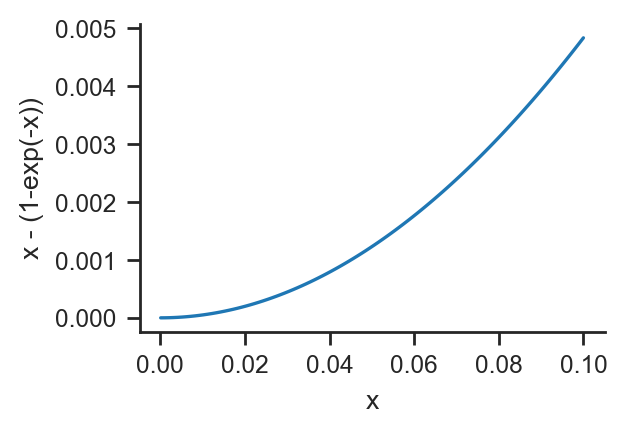

In [17]:
plt.figure(figsize=(3, 2))
x = np.linspace(0.0001, 0.1, 100)
plt.plot(x, x-(1-np.exp(-x)))
#plt.plot(1-np.exp(-s), 1-np.exp(-s))
plt.ylabel('x - (1-exp(-x))')
plt.xlabel('x')
sns.despine()
plt.savefig('x-1-exp[-x]_approx.pdf', bbox_inches='tight', transparent=True)

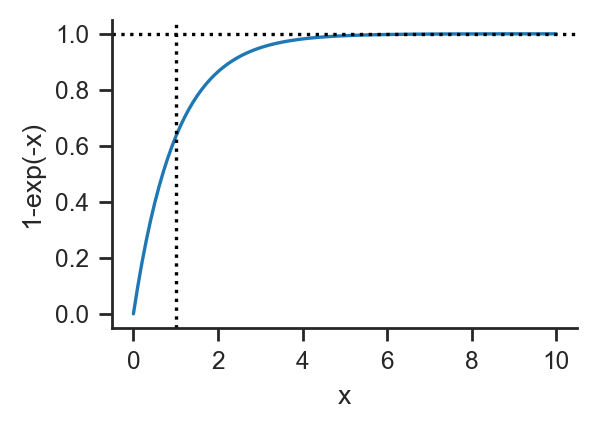

In [19]:
plt.figure(figsize=(3, 2))
x = np.linspace(0.0001, 10, 100)
plt.plot(x, 1-np.exp(-x))
plt.axvline(1, color='black', linestyle='dotted')
plt.axhline(1, color='black', linestyle='dotted')
plt.ylabel('1-exp(-x)')
plt.xlabel('x')
sns.despine()
plt.savefig('1-exp[-x].pdf', bbox_inches='tight', transparent=True)

In [ ]:
def prob_fixation(s, Ne, N):
    return (1 - np.exp(-4*s*Ne/(2*N))) / (1 - np.exp(-4 * Ne * s))

def simple_prob_fixation(s, N):
    return (1 - np.exp(-2*s)) / (1 - np.exp(-4 * N * s))

def simplest_prob_fixation(s, N):
    return 2*s / (1 - np.exp(-4 * N * s))

nr_points = 100

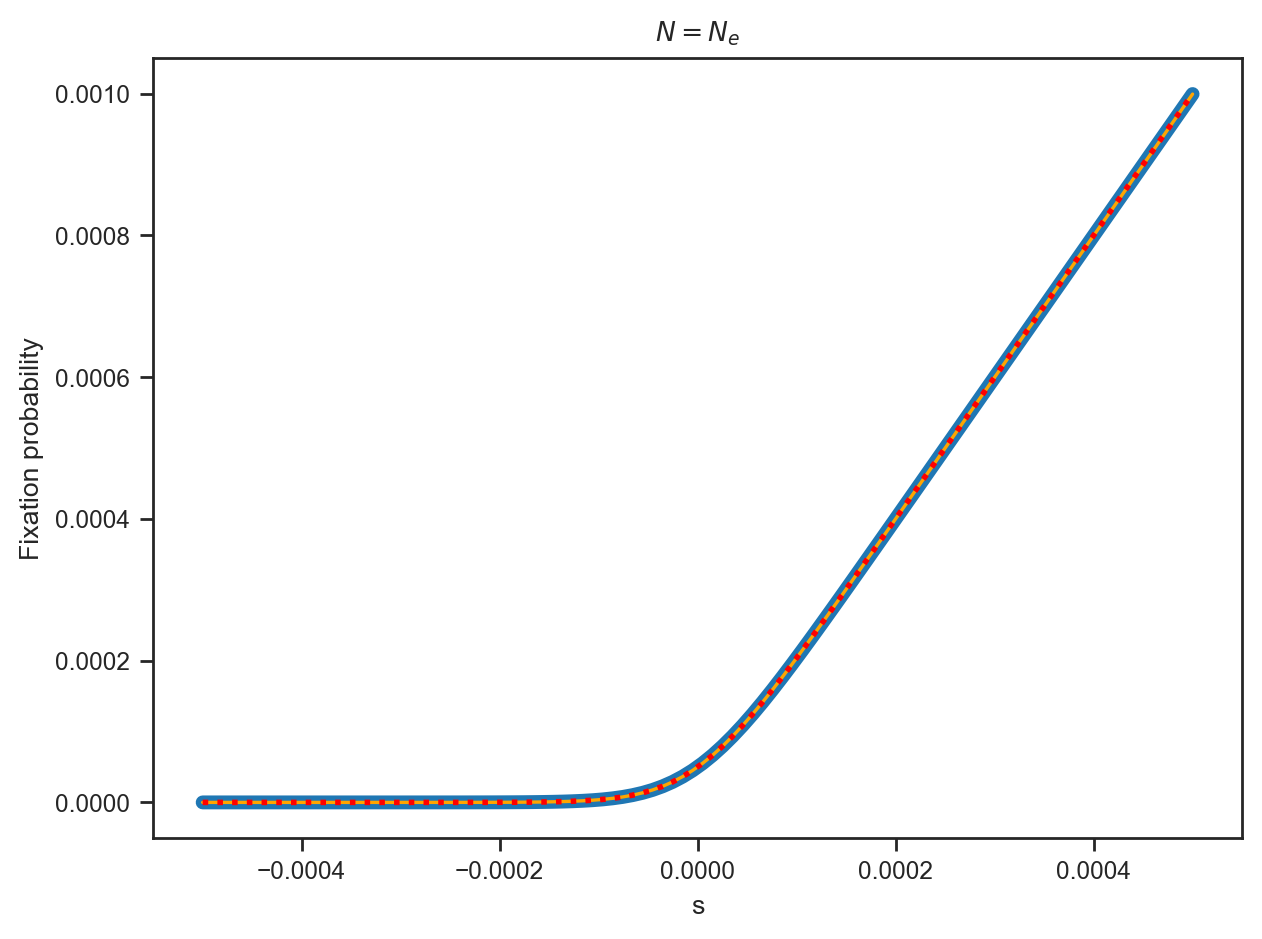

In [ ]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

fig, (ax1) = plt.subplots(1, 1)

ax1.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr), linewidth=5)
ax1.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='orange')
ax1.plot(s_arr, simplest_prob_fixation(s_arr, Ne_arr), color='red', linestyle='dotted', linewidth=2)
ax1.set_xlabel('s')
ax1.set_ylabel('Fixation probability')
ax1.set_title('$N = N_e$')
tight(fig)

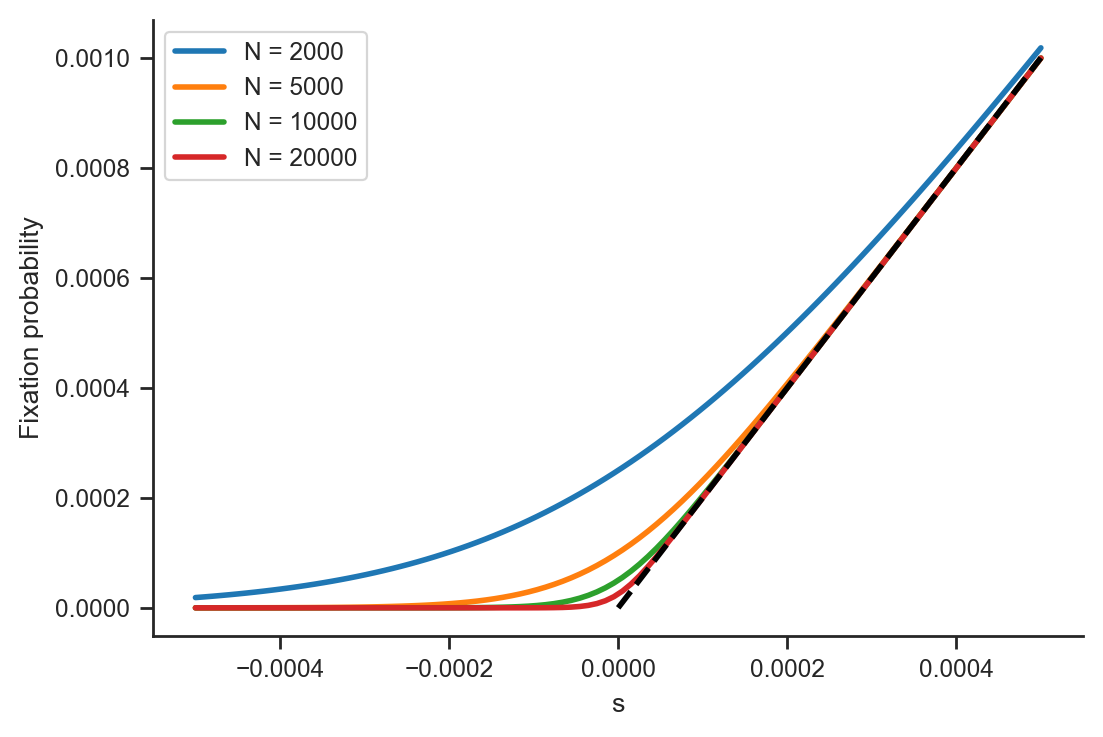

In [102]:
nr_points = 100
Ne = 10000
N = Ne
max_s = 0.0005
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for Ne in [2000, 5000, 10000, 20000]:
    N = Ne
    plt.plot(s_arr, prob_fixation(np.linspace(-max_s, max_s, num=nr_points), np.full(nr_points, Ne), np.full(nr_points, N)), label=f'N = {Ne}', linewidth=2)
plt.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed', color='black', linewidth=2)
plt.legend()
plt.xlabel('s')
plt.ylabel('Fixation probability') 
sns.despine()
tight(fig)

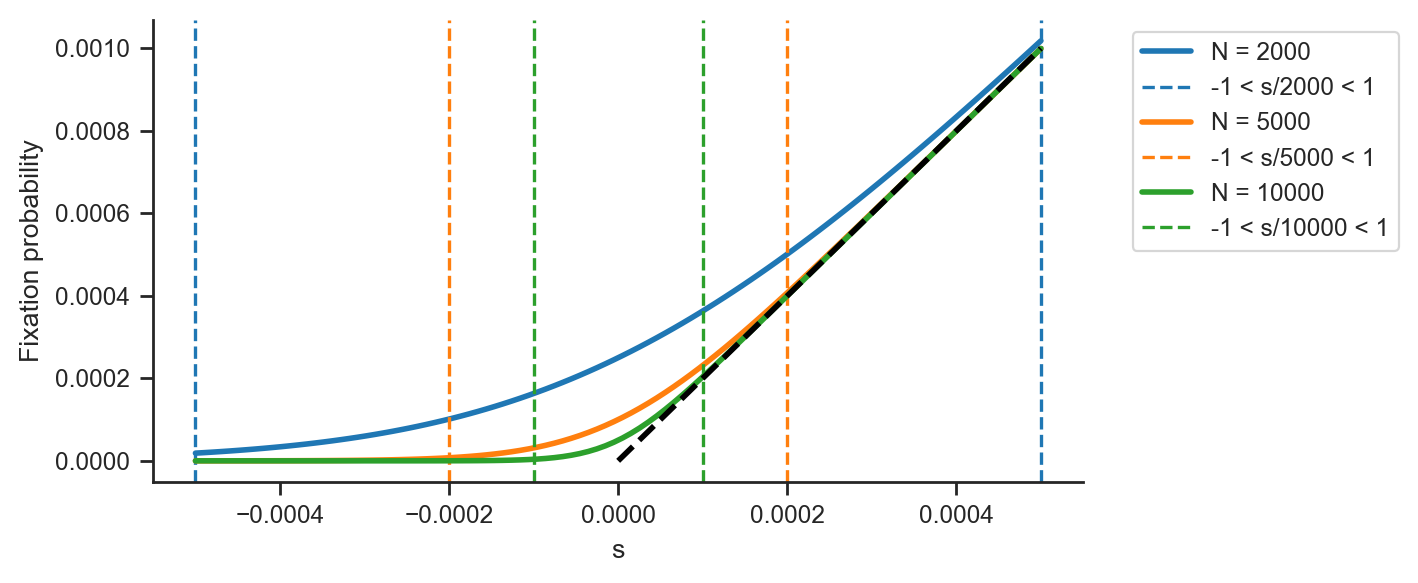

In [128]:
nr_points = 100
Ne = 10000
N = Ne
max_s = 0.0005
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
for i, Ne in enumerate([2000, 5000, 10000]):
    N = Ne
    plt.plot(s_arr, prob_fixation(np.linspace(-max_s, max_s, num=nr_points), np.full(nr_points, Ne), np.full(nr_points, N)), label=f'N = {Ne}', linewidth=2, color=f'C{i}')
    plt.axvline(x=1/Ne, linestyle='dashed', color=f'C{i}', label=f'-1 < s/{Ne} < 1')
    plt.axvline(x=-1/Ne, linestyle='dashed', color=f'C{i}')

plt.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed', color='black', linewidth=2)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('s')
plt.ylabel('Fixation probability') 
sns.despine()
tight(fig)
plt.savefig('fixprob.pdf', bbox_inches='tight')

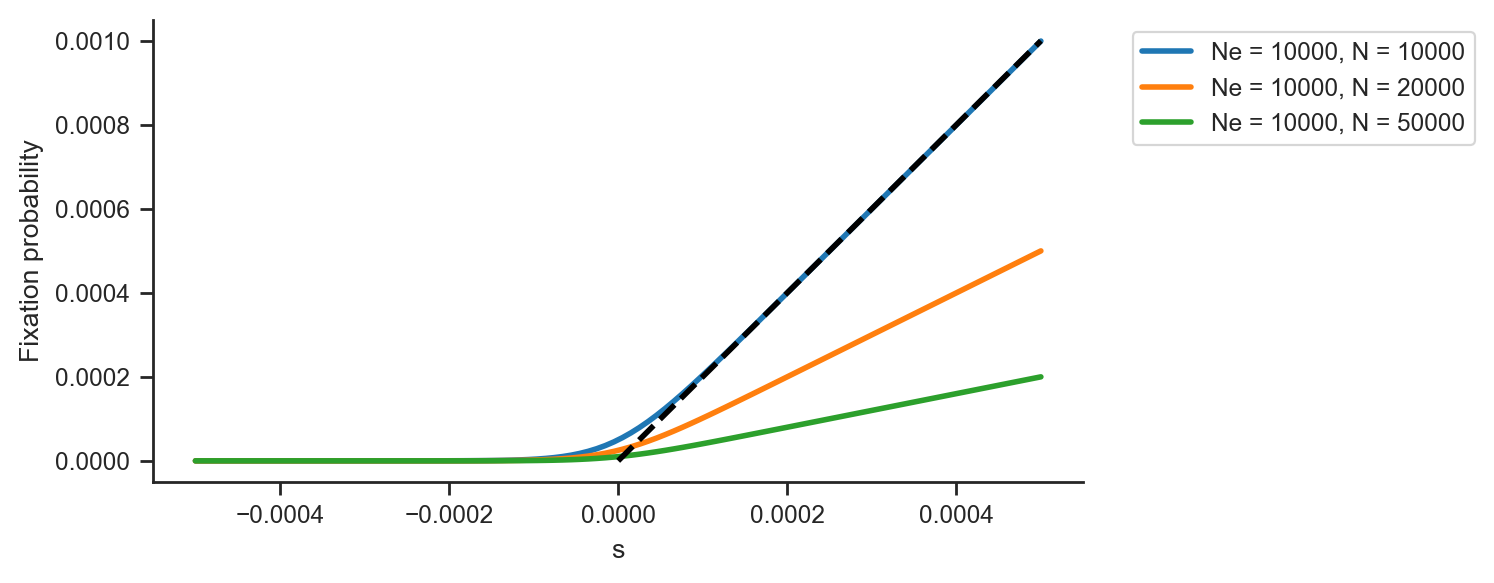

In [141]:
nr_points = 100
Ne = 10000
max_s = 0.0005
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
for i, N in enumerate([10000, 20000, 50000]):
    plt.plot(s_arr, prob_fixation(np.linspace(-max_s, max_s, num=nr_points), np.full(nr_points, Ne), np.full(nr_points, N)), label=f'Ne = {Ne}, N = {N}', linewidth=2, color=f'C{i}')
    # plt.axvline(x=1/Ne, linestyle='dashed', color=f'C{i}', label=f'-1 < s/{Ne} < 1')
    # plt.axvline(x=-1/Ne, linestyle='dashed', color=f'C{i}')

plt.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed', color='black', linewidth=2)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('s')
plt.ylabel('Fixation probability')
sns.despine()
tight(fig)
plt.savefig('fixprob.pdf', bbox_inches='tight')

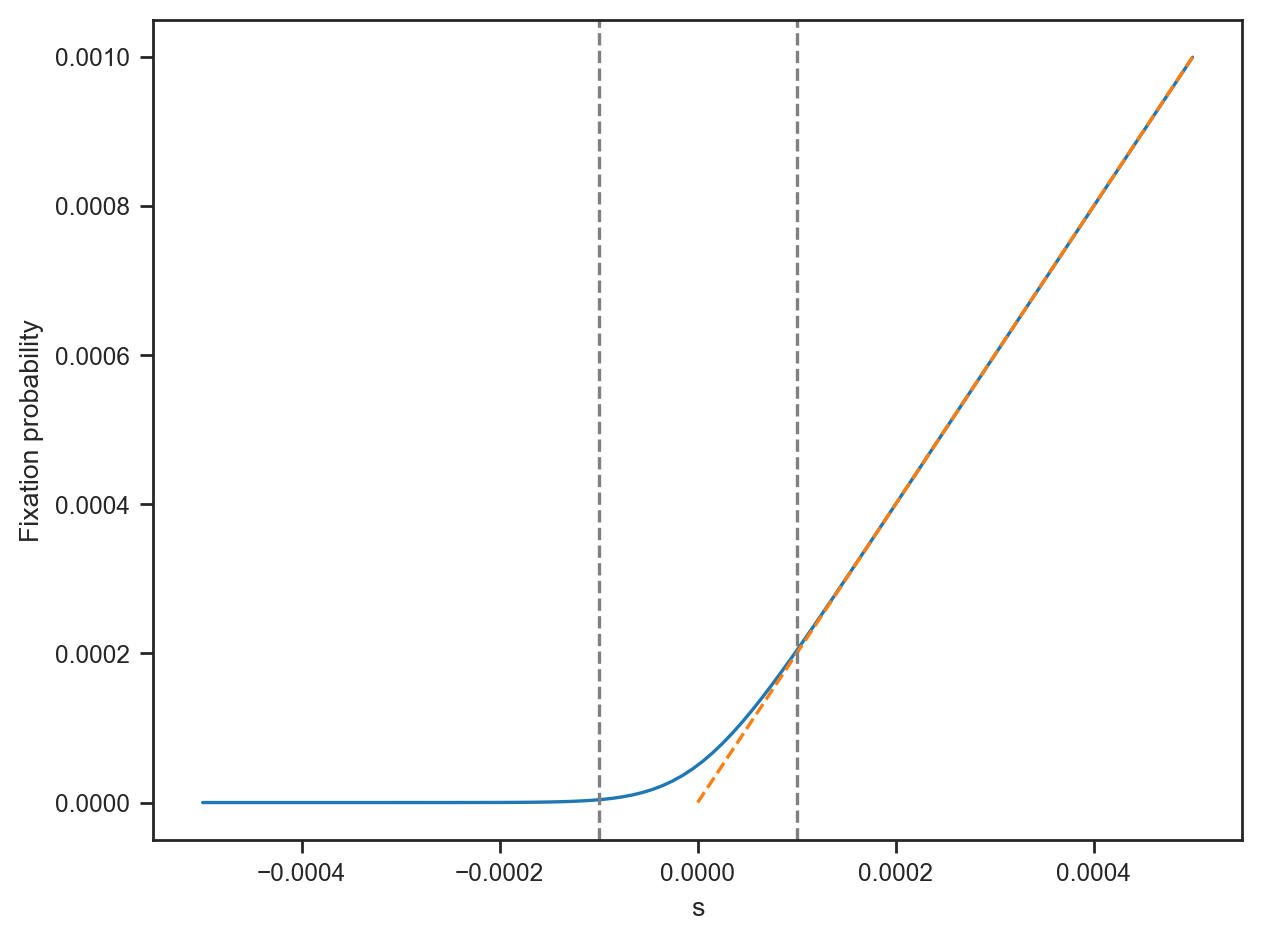

In [78]:
nr_points = 100
Ne = 10000
N = Ne
max_s = 0.0005

fig, ax = plt.subplots(1, 1)
s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

plt.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr))
plt.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed')

#ax.add_patch(Rectangle((-1/Ne, 0), 2/Ne, 0.001, alpha=0.2, color='grey', zorder=0))

plt.axvline(x=1/Ne, linestyle='dashed', color='grey')
plt.axvline(x=-1/Ne, linestyle='dashed', color='grey')
plt.tight_layout()

plt.xlabel('s')
plt.ylabel('Fixation probability') 
tight(fig)

In a non-panmictic population (where $N \neq N_e$)

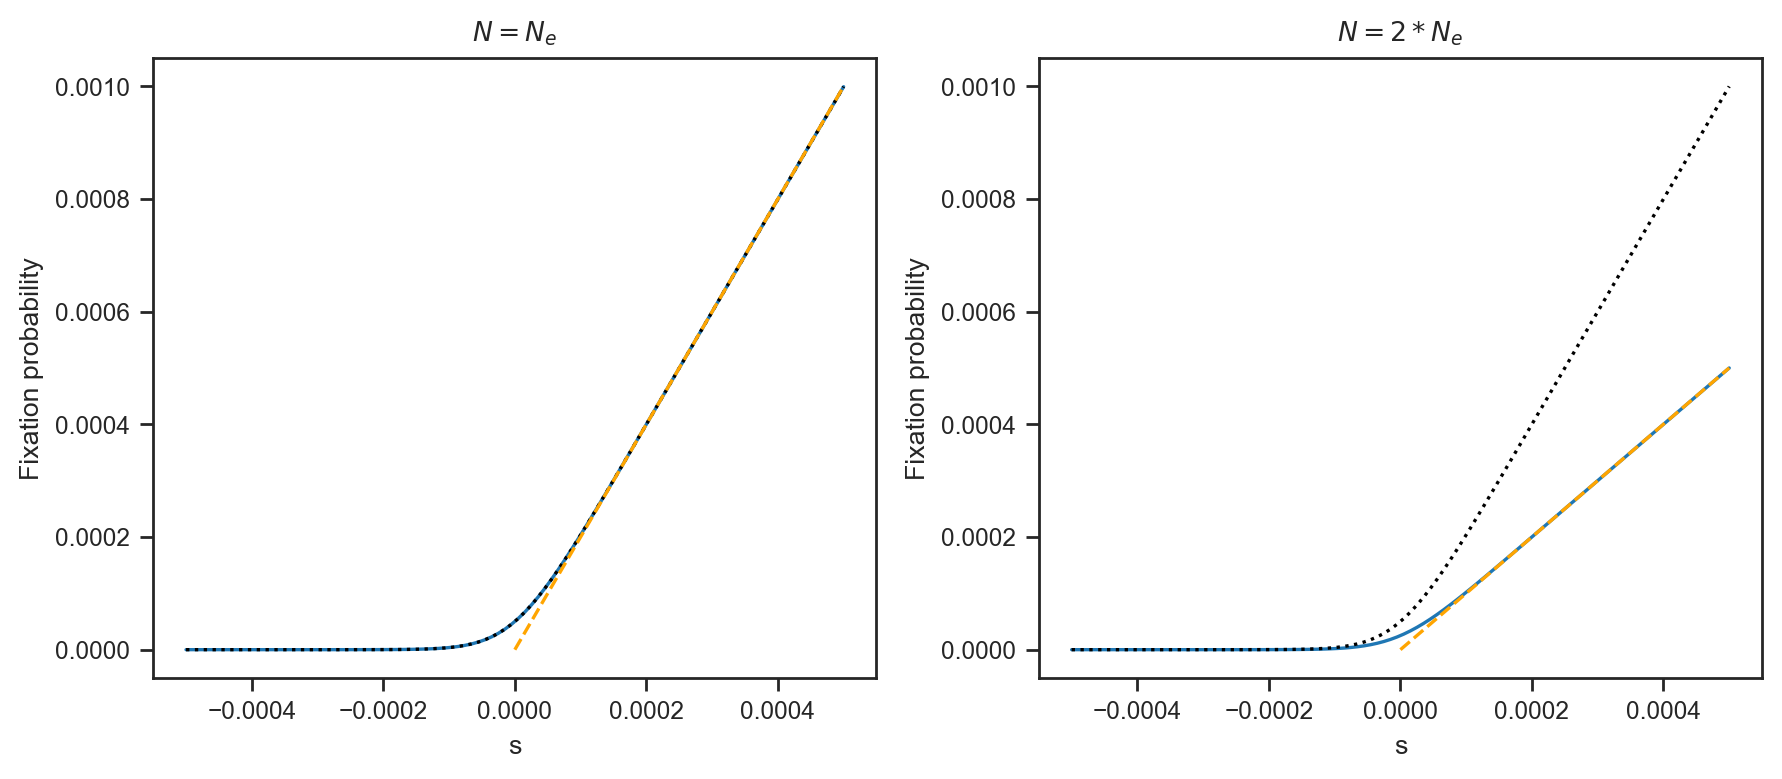

In [ ]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

ax1.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr))
ax1.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax1.set_xlabel('s')
ax1.set_ylabel('Fixation probability')
ax1.set_title('$N = N_e$')

ax2.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr*2))
ax2.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax2.set_xlabel('s')
ax2.set_ylabel('Fixation probability')
ax2.set_title('$N = 2 * N_e$')

ax1.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed', color='orange')
ax2.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2/2, linestyle='dashed', color='orange')

tight(fig)

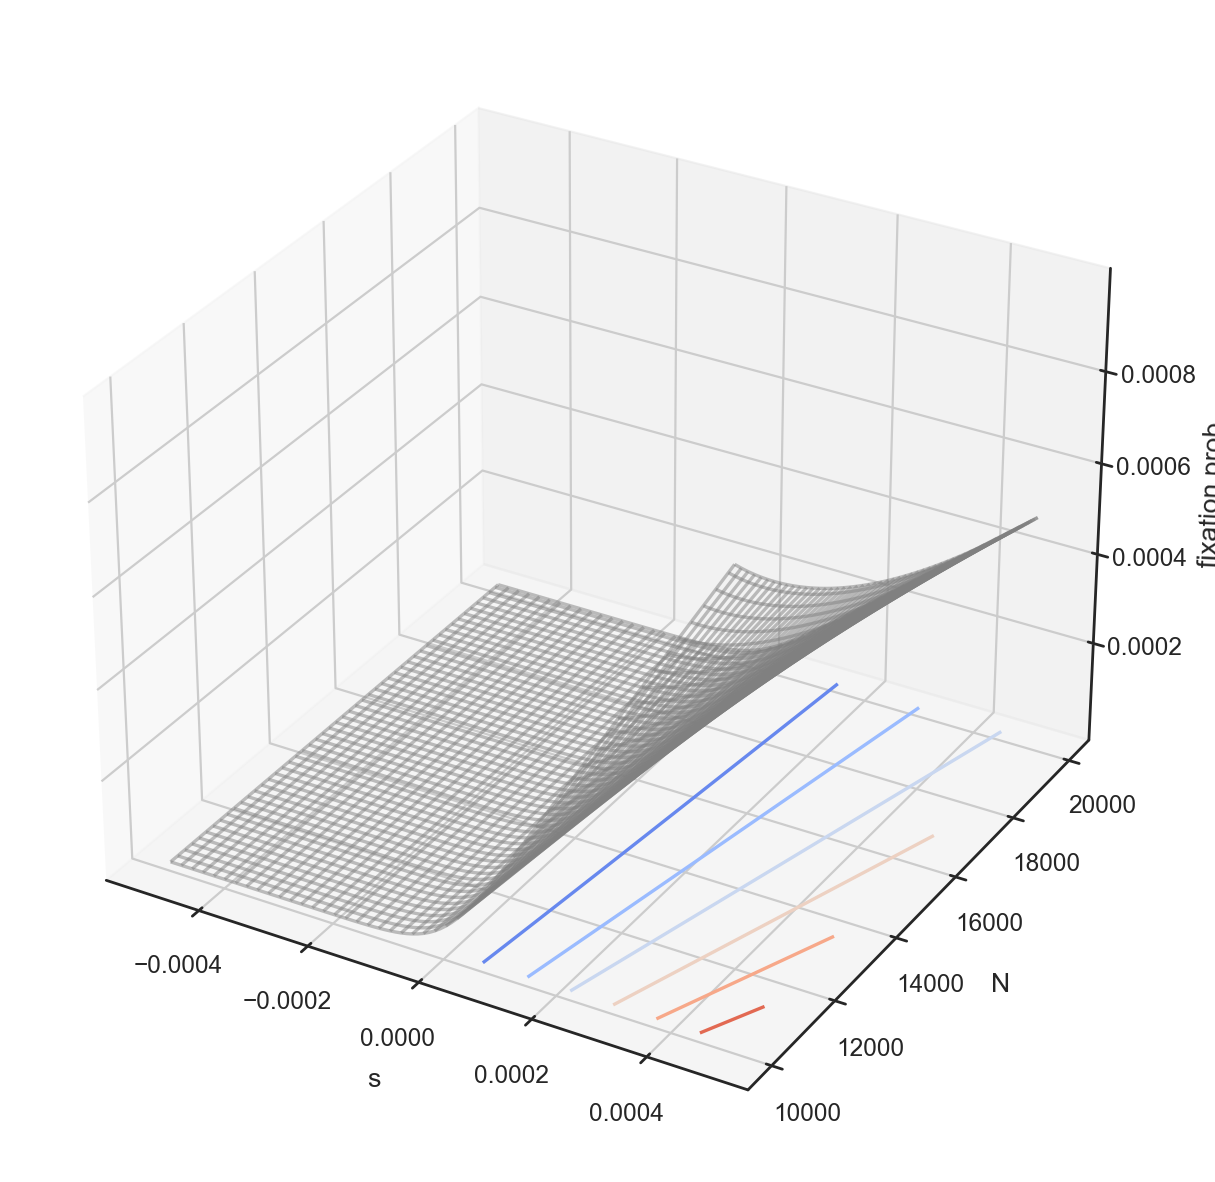

In [ ]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

_s = np.repeat(s_arr, nr_points).reshape((nr_points, nr_points)).transpose()
_N = np.repeat(np.linspace(10000, 20000, num=nr_points), nr_points).reshape((nr_points, nr_points))
_Ne = np.repeat(Ne_arr, nr_points).reshape((nr_points, nr_points))
_f = prob_fixation(_s, _Ne, _N)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(_s, _N, _f, alpha=0.5, color='grey')
#ax.plot_surface(_s, _N, _f, alpha=0.5, color='black')
ax.contour(_s, _N, _f, zdir='z', offset=0, cmap=cm.coolwarm)
ax.set_xlabel('s')
ax.set_ylabel('N')
ax.set_zlabel('fixation prob')

tight(fig)

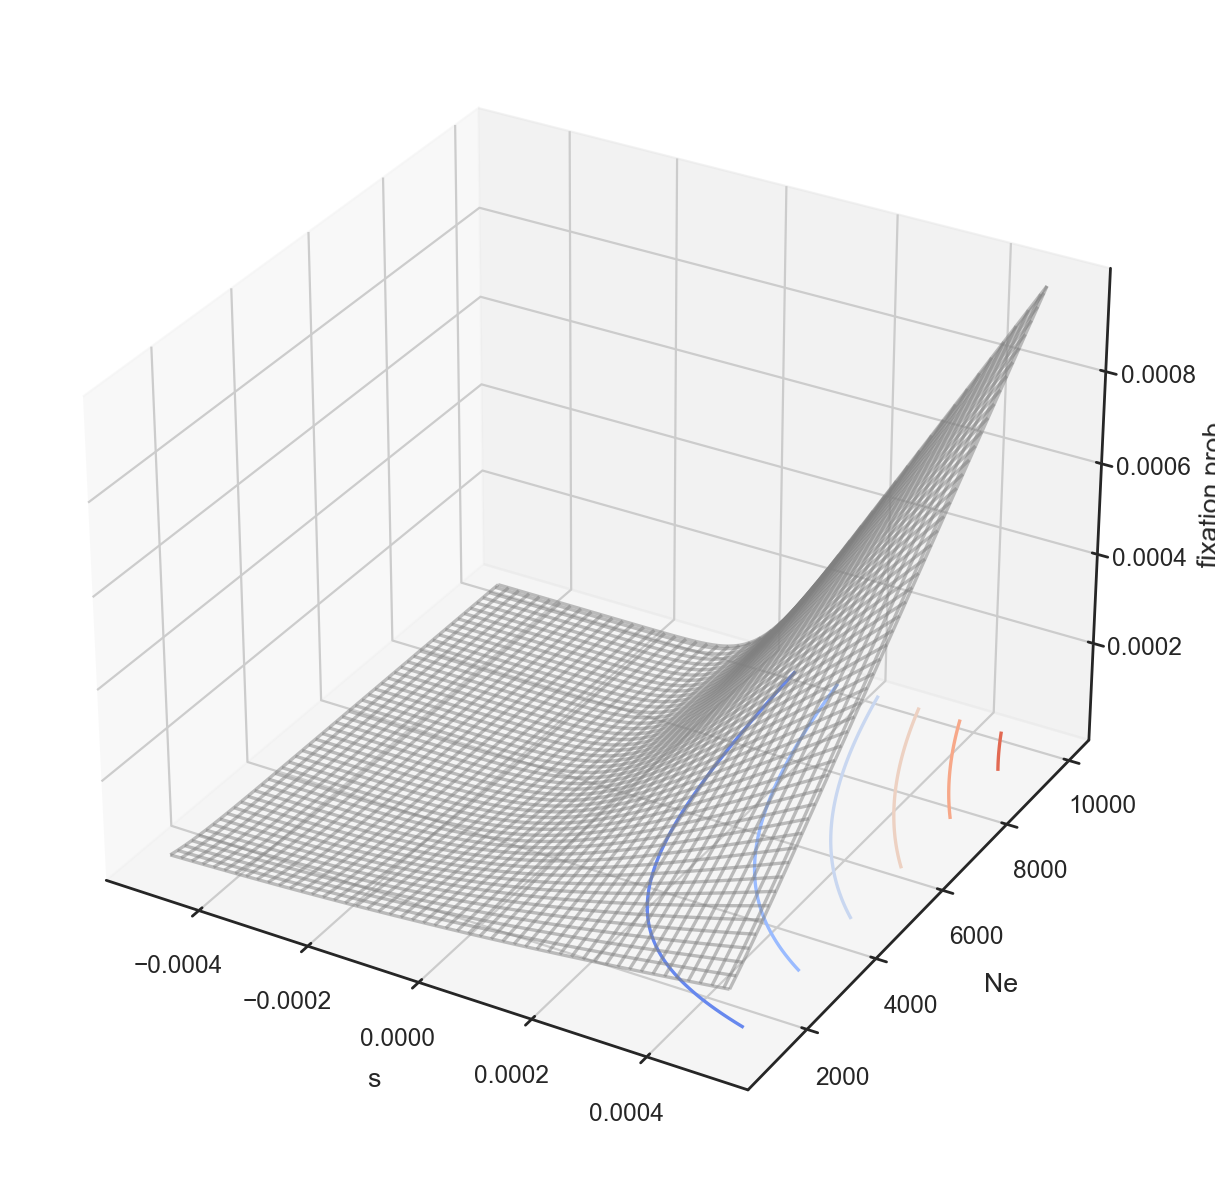

In [ ]:

_s = np.repeat(s_arr, nr_points).reshape((nr_points, nr_points)).transpose()
_N = np.repeat(N_arr, nr_points).reshape((nr_points, nr_points))
_Ne = np.repeat(np.linspace(1000, 10000, num=nr_points), nr_points).reshape((nr_points, nr_points))
_f = prob_fixation(_s, _Ne, _N)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(_s, _Ne, _f, alpha=0.5, color='grey')
#ax.plot_surface(_s, _Ne, _f, alpha=0.2, color='grey')
ax.contour(_s, _Ne, _f, zdir='z', offset=0, cmap=cm.coolwarm)
ax.set_xlabel('s')
ax.set_ylabel('Ne')
ax.set_zlabel('fixation prob')

tight(fig)

Compare to the figures above where we plotted just the fixation probability for a single $N_e$.

## Strong selection

## Fixation time

Strong selection $N_e s \gg 1$:

$$\bar{t} \approx \frac{2 \ln (2N_e)}{s}$$

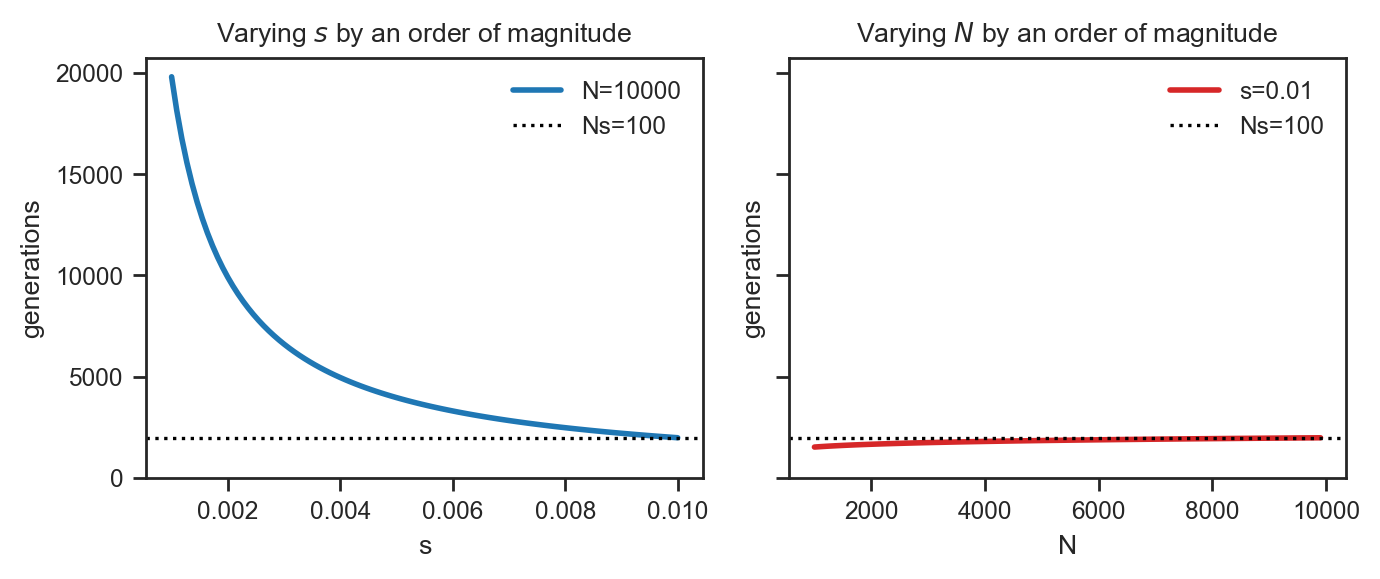

In [319]:
def fixation_time(s, N):
    return 2 * math.log(2*N) / s


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
s_list = np.linspace(0.001, 0.01, 100)
N = 10000
ax1.plot(s_list, [fixation_time(s, N) for s in s_list], linewidth=2, color='C0', label=f'N={N}')
ax1.axhline(fixation_time(s_list[-1], N), linestyle='dotted', color='black', label='Ns=100')
ax1.set_xlabel('s')
ax1.set_ylabel('generations')
ax1.legend(frameon=False)
ax1.set_title('Varying $s$ by an order of magnitude ')


s=0.01
N_list = range(1000, 10000, 100)
ax2.plot(N_list, [fixation_time(s, N) for N in N_list], linewidth=2, color='C3', label=f's={s}')
ax2.axhline(fixation_time(s, N_list[-1]), linestyle='dotted', color='black', label='Ns=100')
ax2.set_xlabel('N')
ax2.set_ylabel('generations')
ax2.legend(frameon=False)
ax2.set_title('Varying $N$ by an order of magnitude ')

ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('fix_time_depends_on_s_and_N.pdf')

Freqency trajectory with deterministic selection $N_e s \gg 1$:

$$ f_A(t) = \frac{f_A(0)}{f_A(0) + (1-s)^t f_a(0)}$$

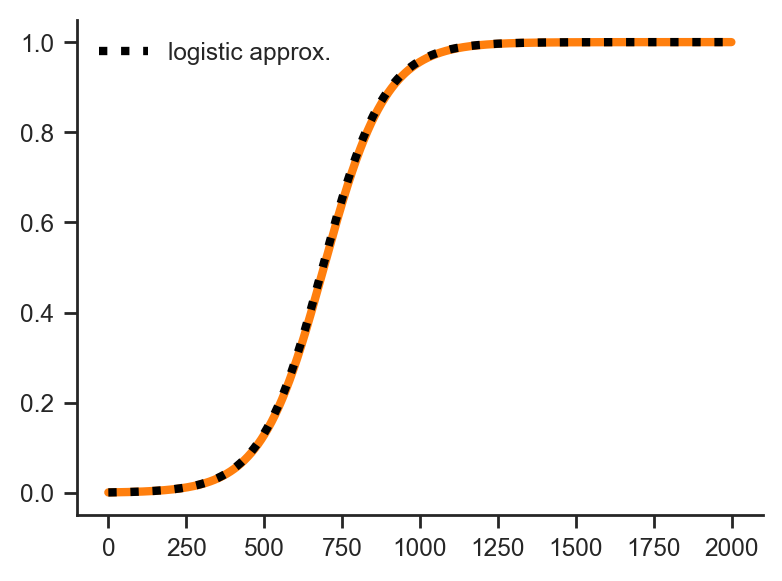

In [269]:
# # Number of alleles at onset of selection
# n = 1
# # Population size (total nr. of alleles)
# N = 10000
# # selection coeficient
# s = 0.01

def logistic_function(t, s, p):
    return p / (p + (1-s)**t * (1-p))

def haploid_trajectory(t, s, p):
    # ts = -(2/(2*N*s)) * np.log(p)    
    # return p / (p + (1-p) * np.exp(-s*(t-(-(2/(2*N*s)) * np.log(p)))))
    return (1/(N))/(1/(N) + (  1 - 1/(N)) * np.exp(-s*(t+np.log(2/(N)) / (N*s) )))


fig = plt.figure(figsize=(4, 3))

N = 1000
s = 0.01
plt.plot([haploid_trajectory(x, s, 1/N) for x in range(2000)], linewidth=3, color='C1')
plt.plot([logistic_function(x, s, 1/N) for x in range(2000)], linewidth=3, color='black', linestyle='dotted', label='logistic approx.') ;
plt.legend(frameon=False)
sns.despine()
tight(fig)
plt.savefig('logistic.pdf')

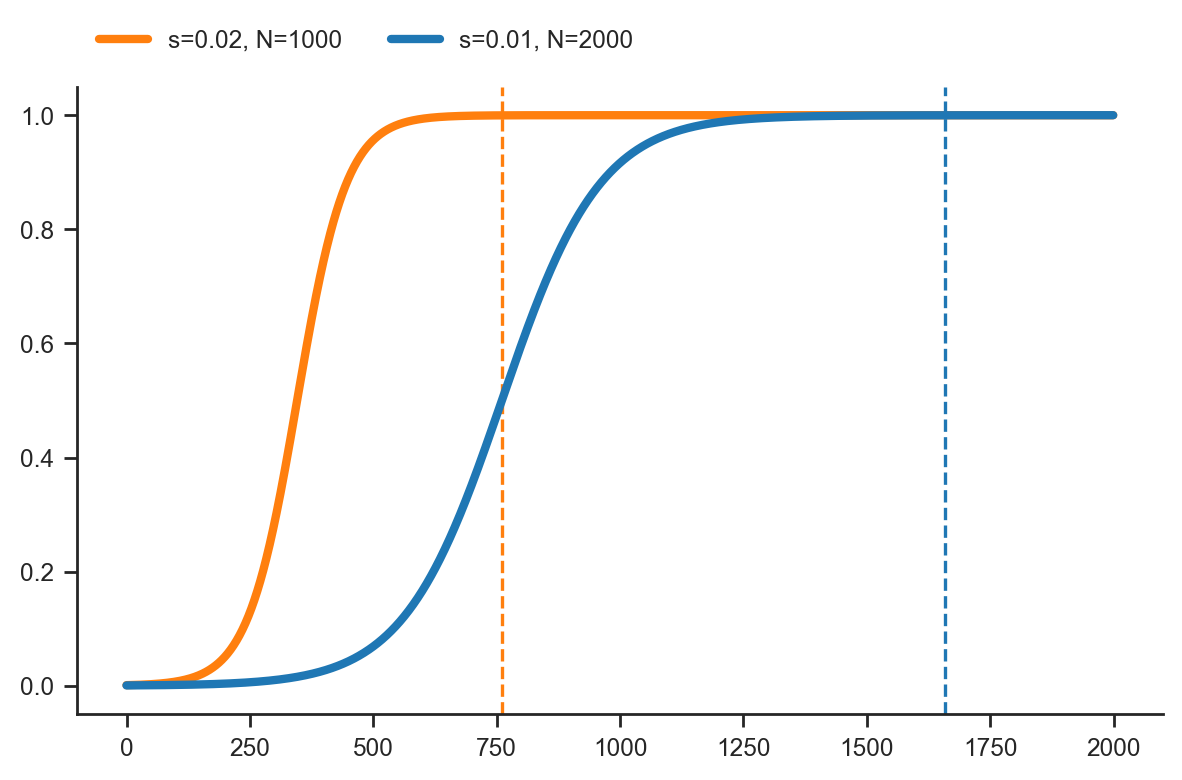

In [285]:
fig = plt.figure(figsize=(6, 4))

N = 1000
s = 0.02
plt.plot([haploid_trajectory(x, s, 1/N) for x in range(2000)], linewidth=3, color='C1', label='s=0.02, N=1000')
plt.axvline(fixation_time(s, N), color='C1', linestyle='dashed')

N = 2000
s = 0.01
plt.plot([haploid_trajectory(x, s, 1/N) for x in range(2000)], linewidth=3, color='C0', label='s=0.01, N=2000')

plt.axvline(fixation_time(s, N), color='C0', linestyle='dashed')



plt.legend()

plt.legend(frameon=False, bbox_to_anchor=(0, 1.02, 1, .02), loc="lower left", ncol=2)

sns.despine()
tight(fig)
plt.savefig('logistic_fixtime.pdf')

Frequency trajectories of new mutations with a strong selective disadvantage. Even with strong positive selection, most alleles are lost. Use the Zoom tool on the figure to zoom in on the bottom left corner of the plot to see the the many alleles thare are lost. Notice how the trajectory of fixed alleles follow the deterministic trajectory.

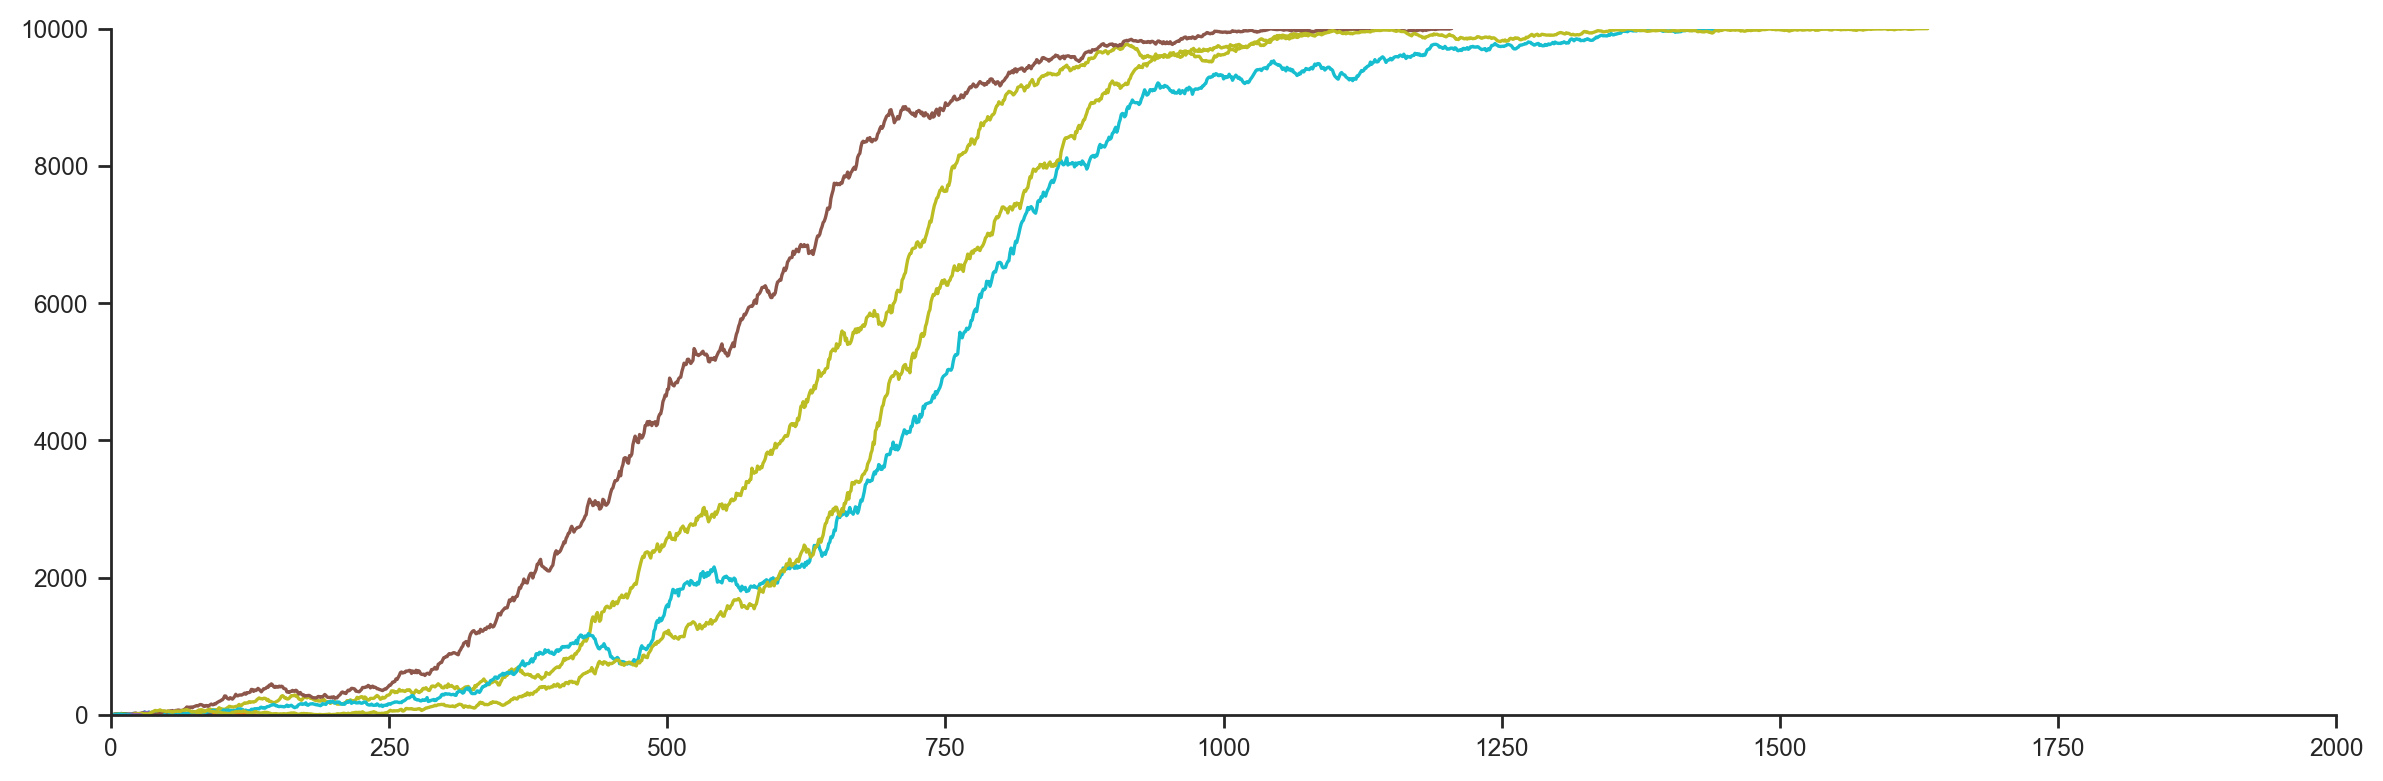

In [228]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

# try out:
# N=100, s=0.01, 
# N=10000, s=0.001, N=10000, s=0.01

fig = plt.figure(figsize=(12, 4))
for i in range(100):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.xlim(0, 2000)
plt.ylim(0, 10000)
sns.despine()
tight(fig)
plt.savefig('strong_s_trajectories.pdf')

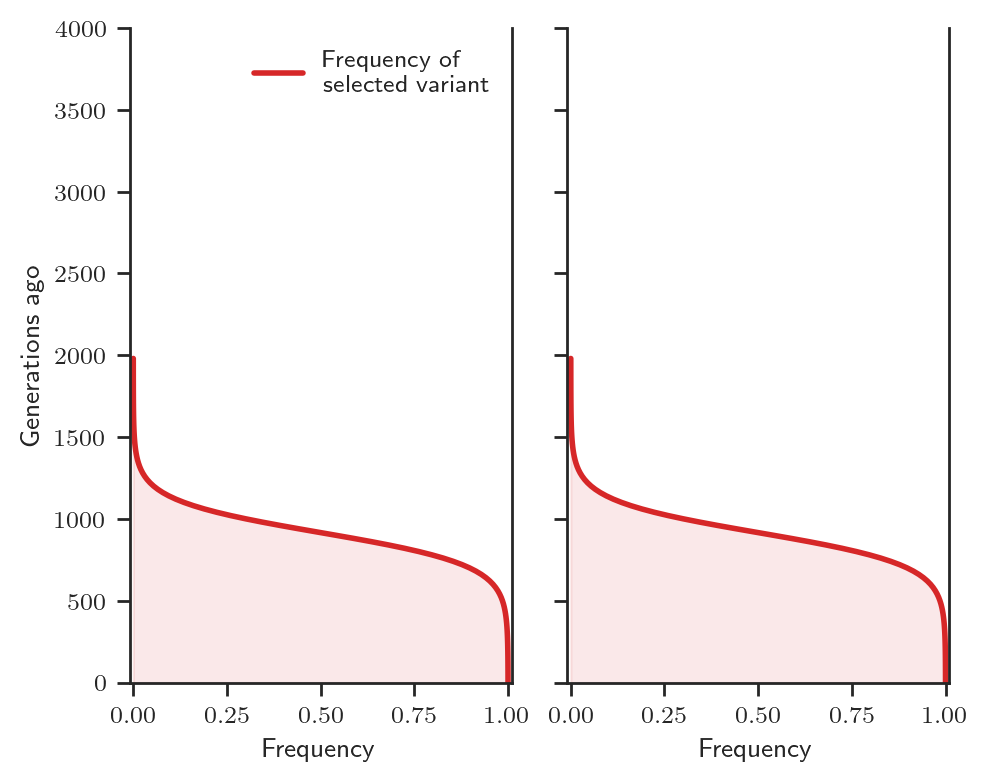

In [381]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 4), sharey=True)

fix_time = fixation_time(0.01, 10000) 

g = np.linspace(fix_time, 1, 100)

ax1.plot([1 - logistic_function(x, 0.01, 1/10000) for x in g], g, linewidth=2, color='C3', label='Frequency of\nselected variant')
ax1.fill_between([1 - logistic_function(x, 0.01, 1/10000) for x in g], g, alpha=0.1, color='C3')
ax1.set_ylim((0, 4000))
ax1.set_ylabel('Generations ago')
ax1.set_xlabel('Frequency')
ax1.legend(frameon=False)
ax1.spines[['top']].set_visible(False)


ax1.set_xlim((-0.01, 1.01))
ax2.plot([1 - logistic_function(x, 0.01, 1/10000) for x in g], g, linewidth=2, color='C3')
ax2.fill_between([1 - logistic_function(x, 0.01, 1/10000) for x in g], g, alpha=0.1, color='C3')
ax2.set_ylim((0, 4000))
ax2.set_xlim((-0.01, 1.01))
ax2.set_xlabel('Frequency')
ax2.spines[['top']].set_visible(False)
plt.tight_layout()
# plt.axhline(fix_time, linestyle='dashed', color='black',)
# plt.legend(frameon=False)
plt.savefig('sweep_escape.pdf')